# Predicting Solar Power Generation
Author: Shane Luna
<hr>

## Overview: <a class="anchor" id="overview"></a>
This project utilizes Solar Plant Generation Data provided by Kaggle, and explores the following 2 questions:

1. Can one identify poor performing equipment (inverters) for maintenance/replacement?
2. Can one predict energy generation for a day given temperature and irradiance?

<hr>

## Table of Contents

[1. Dataset (w/ Download Instructions)](#dataset-overview)  
[2. Exploratory Data Analysis (EDA)](#eda)  
&nbsp;&nbsp;&nbsp;&nbsp;[a. Imports](#dataset-imports)  
&nbsp;&nbsp;&nbsp;&nbsp;[b. Data Load](#dataset-load)  
&nbsp;&nbsp;&nbsp;&nbsp;[c. Data Quality Analysis](#dataset-quality-analysis)  
&nbsp;&nbsp;&nbsp;&nbsp;[d. Transformations](#dataset-transformations)  
&nbsp;&nbsp;&nbsp;&nbsp;[e. Data Distribution](#dataset-distribution)  
&nbsp;&nbsp;&nbsp;&nbsp;[f. Trends](#dataset-trends)  
&nbsp;&nbsp;&nbsp;&nbsp;[g. Relationships Between Variables](#dataset-relationships-between-variables)  
[3. Research Questions & Analysis](#step3)  
&nbsp;&nbsp;&nbsp;&nbsp;[a. Research Questions](#research-questions)  
&nbsp;&nbsp;&nbsp;&nbsp;[b. Analysis](#research-questions-analysis)  
[4. Findings](#findings)  
<hr>

### 1. Dataset (w/ Download Instructions) <a class="anchor" id="dataset-overview"></a>

#### Kaggle Solar Power Generation Data

Source: https://www.kaggle.com/anikannal/solar-power-generation-data

Kaggle Description:   
"This data has been gathered at two solar power plants in India over a 34 day period. It has two pairs of files - each pair has one power generation dataset and one sensor readings dataset. The power generation datasets are gathered at the inverter level - each inverter has multiple lines of solar panels attached to it. The sensor data is gathered at a plant level - single array of sensors optimally placed at the plant."

Files Provided:
- Plant_1_Generation_Data.csv
- Plant_1_Weather_Sensor_Data.csv
- Plant_2_Generation_Data.csv
- Plant_2_Weather_Sensor_Data.csv

### Solar Power Generation Process Flow (Brief)

Solar Panel --> (DC Power) --> Inverter --> (AC Power) --> Home Appliances or Grid

![Image of Solar Power Generation Process Flow](https://images.squarespace-cdn.com/content/v1/5354537ce4b0e65f5c20d562/1506258520485-W98MFFSOA5E6N1AEFWD0/ke17ZwdGBToddI8pDm48kKClvPty_UB8EqNrB-JecmhZw-zPPgdn4jUwVcJE1ZvWQUxwkmyExglNqGp0IvTJZamWLI2zvYWH8K3-s_4yszcp2ryTI0HqTOaaUohrI8PIPmeV9eg-Kq7_WPOUltk68mn3Idqp5yTJrcsawoB4sKYKMshLAGzx4R3EDFOm1kBS/Solar+with+Coupled+AC+battery+-+system+diagram.jpg)

### Download Instructions

1. Navigate to [kaggle source link](https://www.kaggle.com/anikannal/solar-power-generation-data).
2. Click "Download" towards upper right-hand corner to download zipped dataset (archive.zip).
3. Once downloaded, unzip the file to get a folder called "archive" with the 4 files listed above within it.
4. Move the archive folder (with the files included) to the same directory as this jupyter notebook file.

<hr>

### 2. Exploratory Data Analysis (EDA) <a class="anchor" id="eda"></a>

In this section, we explore what is present in the data, how it is organized, and looks of the following questions:

* Are there data quality issues in the dataset (noisy, missing data, etc.)? 
* What is needed to clean and/or transform the raw data for analysis?
* How is the data distributed? 
* What are some common trends?
* What are the relationships between variables in your datasets?

#### a) Imports<a class="anchor" id="dataset-imports"></a>

Below are the imported libraries necessary for running the exploration and analysis done in the notebook.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.preprocessing import StandardScaler

%matplotlib inline

#### b) Data Load<a class="anchor" id="dataset-load"></a>

Inital load of the csv files into pandas dataframes.

In [2]:
# Plant 1
p1_generation_df = pd.read_csv('./archive/Plant_1_Generation_Data.csv')
p1_weather_df = pd.read_csv('./archive/Plant_1_Weather_Sensor_Data.csv')

# Plant 2
p2_generation_df = pd.read_csv('./archive/Plant_2_Generation_Data.csv')
p2_weather_df = pd.read_csv('./archive/Plant_2_Weather_Sensor_Data.csv')

#### c) Data Quality Analysis <a class="anchor" id="dataset-quality-analysis"></a>

Checking quality of data. 
Data was said to be recorded in 15-minute intervals over 34 days. There are 96 15-minute intervals in 1 day. If 34 full days, then should be 3264 total intervals.  

Let's start with the weather sensor files. Each file is said to come from a single sensor, therefore, each file should have 3264 records if no gaps.

In [3]:
print(p1_weather_df.shape)
p1_weather_df.head()

(3182, 6)


,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
1,2020-05-15 00:15:00,4135001,HmiyD2TTLFNqkNe,25.084589,22.761668,0.0
2,2020-05-15 00:30:00,4135001,HmiyD2TTLFNqkNe,24.935753,22.592306,0.0
3,2020-05-15 00:45:00,4135001,HmiyD2TTLFNqkNe,24.846130,22.360852,0.0
4,2020-05-15 01:00:00,4135001,HmiyD2TTLFNqkNe,24.621525,22.165423,0.0


In [4]:
p1_weather_df.tail()

,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
3177,2020-06-17 22:45:00,4135001,HmiyD2TTLFNqkNe,22.150570,21.480377,0.0
3178,2020-06-17 23:00:00,4135001,HmiyD2TTLFNqkNe,22.129816,21.389024,0.0
3179,2020-06-17 23:15:00,4135001,HmiyD2TTLFNqkNe,22.008275,20.709211,0.0
3180,2020-06-17 23:30:00,4135001,HmiyD2TTLFNqkNe,21.969495,20.734963,0.0
3181,2020-06-17 23:45:00,4135001,HmiyD2TTLFNqkNe,21.909288,20.427972,0.0


In [5]:
p1_weather_df.describe().T

,count,mean,std,min,25%,50%,75%,max
PLANT_ID,3182.0,4.135001e+06,0.000000,4.135001e+06,4.135001e+06,4.135001e+06,4.135001e+06,4.135001e+06
AMBIENT_TEMPERATURE,3182.0,2.553161e+01,3.354856,2.039850e+01,2.270518e+01,2.461381e+01,2.792053e+01,3.525249e+01
MODULE_TEMPERATURE,3182.0,3.109102e+01,12.261222,1.814042e+01,2.109055e+01,2.461806e+01,4.130784e+01,6.554571e+01
IRRADIATION,3182.0,2.283128e-01,0.300836,0.000000e+00,0.000000e+00,2.465348e-02,4.495884e-01,1.221652e+00


In [6]:
print(p2_weather_df.shape)
p2_weather_df.head()

(3259, 6)


,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,4136001,iq8k7ZNt4Mwm3w0,27.004764,25.060789,0.0
1,2020-05-15 00:15:00,4136001,iq8k7ZNt4Mwm3w0,26.880811,24.421869,0.0
2,2020-05-15 00:30:00,4136001,iq8k7ZNt4Mwm3w0,26.682055,24.427290,0.0
3,2020-05-15 00:45:00,4136001,iq8k7ZNt4Mwm3w0,26.500589,24.420678,0.0
4,2020-05-15 01:00:00,4136001,iq8k7ZNt4Mwm3w0,26.596148,25.088210,0.0


In [7]:
p2_weather_df.tail()

,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
3254,2020-06-17 22:45:00,4136001,iq8k7ZNt4Mwm3w0,23.511703,22.856201,0.0
3255,2020-06-17 23:00:00,4136001,iq8k7ZNt4Mwm3w0,23.482282,22.744190,0.0
3256,2020-06-17 23:15:00,4136001,iq8k7ZNt4Mwm3w0,23.354743,22.492245,0.0
3257,2020-06-17 23:30:00,4136001,iq8k7ZNt4Mwm3w0,23.291048,22.373909,0.0
3258,2020-06-17 23:45:00,4136001,iq8k7ZNt4Mwm3w0,23.202871,22.535908,0.0


In [8]:
p2_weather_df.describe().T

,count,mean,std,min,25%,50%,75%,max
PLANT_ID,3259.0,4.136001e+06,0.000000,4.136001e+06,4.136001e+06,4.136001e+06,4.136001e+06,4.136001e+06
AMBIENT_TEMPERATURE,3259.0,2.806940e+01,4.061556,2.094238e+01,2.460213e+01,2.698126e+01,3.105676e+01,3.918164e+01
MODULE_TEMPERATURE,3259.0,3.277241e+01,11.344034,2.026512e+01,2.371688e+01,2.753461e+01,4.048065e+01,6.663595e+01
IRRADIATION,3259.0,2.327370e-01,0.312693,0.000000e+00,0.000000e+00,1.904047e-02,4.387172e-01,1.098766e+00


In [9]:
# null check
print(p1_weather_df[p1_weather_df.isnull().any(axis=1)])
print(p2_weather_df[p2_weather_df.isnull().any(axis=1)])

Empty DataFrame
Columns: [DATE_TIME, PLANT_ID, SOURCE_KEY, AMBIENT_TEMPERATURE, MODULE_TEMPERATURE, IRRADIATION]
Index: []
Empty DataFrame
Columns: [DATE_TIME, PLANT_ID, SOURCE_KEY, AMBIENT_TEMPERATURE, MODULE_TEMPERATURE, IRRADIATION]
Index: []


**Observations:**

p1_weather_df (Plant_1_Weather_Sensor_Data.csv)
- missing 82 (2.5%) 15-minute interval readings over 34 day period
- no rows with a null value
- DATE_TIME format: yyyy-mm-dd HH:mm:ss

<br>

p2_weather_df (Plant_2_Weather_Sensor_Data.csv)
- missing 5 (0.2%) 15-minute interval readings over 34 day period
- no rows with a null value
- DATE_TIME format: yyyy-mm-dd HH:mm:ss

An initial thought of why the weather files were showing < 3264 records was that maybe it wasn't 34 full days. I decided to check the head and tail of the dataframes. At a quick glance, I did make the assumption that the records were in chronological order as that's what it showed looking at the DATE_TIME column of the first/last x rows. I couldn't take a min/max as they were not datetime datatypes initially. We'll add a conversion step and double check in the transformation section. Both files showed a presumed start datetime of 2020-05-15 00:00:00 and a presumed end datetime of 2020-06-17 23:45:00 which would equate to 34 full days with 15-minute intervals.

Doing a quick group by below, we can see what times of day were missing an interval. Still doing some workaround checks until converting the DATE_TIME column to actual datetime. Again, see that within transformation section.

In [10]:
p1_weather_df_cpy = p1_weather_df.copy()

# Split datetime to date and time
p1_weather_df_cpy[['DATE', 'TIME']] = p1_weather_df_cpy['DATE_TIME'].str.split(' ', expand=True)

# Should be 34 of each time, 1 for each day
time_counts1 = p1_weather_df_cpy['TIME'].value_counts()

# full list of times
# time_counts1[time_counts1 < 34]

# just head to save space
time_counts1[time_counts1 < 34].head()

00:00:00    33
16:00:00    33
15:30:00    33
15:15:00    33
15:00:00    33
Name: TIME, dtype: int64

In [11]:
p2_weather_df_cpy = p2_weather_df.copy()

# Split datetime to date and time
p2_weather_df_cpy[['DATE', 'TIME']] = p2_weather_df_cpy['DATE_TIME'].str.split(' ', expand=True)

# Should be 34 of each time -- 1 for each day
time_counts2 = p2_weather_df_cpy['TIME'].value_counts()

# full list of times
time_counts2[time_counts2 < 34]

17:45:00    33
14:00:00    33
23:15:00    33
16:00:00    32
Name: TIME, dtype: int64

In [12]:
print(p1_generation_df.shape)
p1_generation_df.head()

(68778, 7)


,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,15-05-2020 00:00,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0
1,15-05-2020 00:00,4135001,1IF53ai7Xc0U56Y,0.0,0.0,0.0,6183645.0
2,15-05-2020 00:00,4135001,3PZuoBAID5Wc2HD,0.0,0.0,0.0,6987759.0
3,15-05-2020 00:00,4135001,7JYdWkrLSPkdwr4,0.0,0.0,0.0,7602960.0
4,15-05-2020 00:00,4135001,McdE0feGgRqW7Ca,0.0,0.0,0.0,7158964.0


In [13]:
p1_generation_df.tail()

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
68773,17-06-2020 23:45,4135001,uHbuxQJl8lW7ozc,0.0,0.0,5967.000,7287002.0
68774,17-06-2020 23:45,4135001,wCURE6d3bPkepu2,0.0,0.0,5147.625,7028601.0
68775,17-06-2020 23:45,4135001,z9Y9gH1T5YWrNuG,0.0,0.0,5819.000,7251204.0
68776,17-06-2020 23:45,4135001,zBIq5rxdHJRwDNY,0.0,0.0,5817.000,6583369.0
68777,17-06-2020 23:45,4135001,zVJPv84UY57bAof,0.0,0.0,5910.000,7363272.0


In [14]:
p1_generation_df.describe().T

,count,mean,std,min,25%,50%,75%,max
PLANT_ID,68778.0,4.135001e+06,0.000000,4135001.0,4.135001e+06,4.135001e+06,4.135001e+06,4135001.000
DC_POWER,68778.0,3.147426e+03,4036.457169,0.0,0.000000e+00,4.290000e+02,6.366964e+03,14471.125
AC_POWER,68778.0,3.078028e+02,394.396439,0.0,0.000000e+00,4.149375e+01,6.236187e+02,1410.950
DAILY_YIELD,68778.0,3.295969e+03,3145.178309,0.0,0.000000e+00,2.658714e+03,6.274000e+03,9163.000
TOTAL_YIELD,68778.0,6.978712e+06,416271.982856,6183645.0,6.512003e+06,7.146685e+06,7.268706e+06,7846821.000


In [15]:
p1_inverters = p1_generation_df['SOURCE_KEY'].value_counts()
print(p1_inverters.shape)
p1_inverters

(22,)


bvBOhCH3iADSZry    3155
1BY6WEcLGh8j5v7    3154
7JYdWkrLSPkdwr4    3133
VHMLBKoKgIrUVDU    3133
ZnxXDlPa8U1GXgE    3130
ih0vzX44oOqAx2f    3130
z9Y9gH1T5YWrNuG    3126
wCURE6d3bPkepu2    3126
uHbuxQJl8lW7ozc    3125
pkci93gMrogZuBj    3125
iCRJl6heRkivqQ3    3125
rGa61gmuvPhdLxV    3124
sjndEbLyjtCKgGv    3124
McdE0feGgRqW7Ca    3124
zVJPv84UY57bAof    3124
ZoEaEvLYb1n2sOq    3123
1IF53ai7Xc0U56Y    3119
adLQvlD726eNBSB    3119
zBIq5rxdHJRwDNY    3119
WRmjgnKYAwPKWDb    3118
3PZuoBAID5Wc2HD    3118
YxYtjZvoooNbGkE    3104
Name: SOURCE_KEY, dtype: int64

In [16]:
print(p2_generation_df.shape)
p2_generation_df.head()

(67698, 7)


,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,2020-05-15 00:00:00,4136001,4UPUqMRk7TRMgml,0.0,0.0,9425.000000,2.429011e+06
1,2020-05-15 00:00:00,4136001,81aHJ1q11NBPMrL,0.0,0.0,0.000000,1.215279e+09
2,2020-05-15 00:00:00,4136001,9kRcWv60rDACzjR,0.0,0.0,3075.333333,2.247720e+09
3,2020-05-15 00:00:00,4136001,Et9kgGMDl729KT4,0.0,0.0,269.933333,1.704250e+06
4,2020-05-15 00:00:00,4136001,IQ2d7wF4YD8zU1Q,0.0,0.0,3177.000000,1.994153e+07


In [17]:
p2_generation_df.tail()

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
67693,2020-06-17 23:45:00,4136001,q49J1IKaHRwDQnt,0.0,0.0,4157.0,520758.0
67694,2020-06-17 23:45:00,4136001,rrq4fwE8jgrTyWY,0.0,0.0,3931.0,121131356.0
67695,2020-06-17 23:45:00,4136001,vOuJvMaM2sgwLmb,0.0,0.0,4322.0,2427691.0
67696,2020-06-17 23:45:00,4136001,xMbIugepa2P7lBB,0.0,0.0,4218.0,106896394.0
67697,2020-06-17 23:45:00,4136001,xoJJ8DcxJEcupym,0.0,0.0,4316.0,209335741.0


In [18]:
p2_generation_df.describe().T

,count,mean,std,min,25%,50%,75%,max
PLANT_ID,67698.0,4.136001e+06,0.000000e+00,4136001.0,4.136001e+06,4136001.0,4.136001e+06,4.136001e+06
DC_POWER,67698.0,2.467020e+02,3.705696e+02,0.0,0.000000e+00,0.0,4.465917e+02,1.420933e+03
AC_POWER,67698.0,2.412778e+02,3.621121e+02,0.0,0.000000e+00,0.0,4.382150e+02,1.385420e+03
DAILY_YIELD,67698.0,3.294890e+03,2.919448e+03,0.0,2.727500e+02,2911.0,5.534000e+03,9.873000e+03
TOTAL_YIELD,67698.0,6.589448e+08,7.296678e+08,0.0,1.996494e+07,282627587.0,1.348495e+09,2.247916e+09


In [19]:
p2_inverters = p2_generation_df['SOURCE_KEY'].value_counts()
print(p2_inverters.shape)
p2_inverters

(22,)


xoJJ8DcxJEcupym    3259
WcxssY2VbP4hApt    3259
9kRcWv60rDACzjR    3259
vOuJvMaM2sgwLmb    3259
rrq4fwE8jgrTyWY    3259
LYwnQax7tkwH5Cb    3259
LlT2YUhhzqhg5Sw    3259
q49J1IKaHRwDQnt    3259
oZZkBaNadn6DNKz    3259
PeE6FRyGXUgsRhN    3259
81aHJ1q11NBPMrL    3259
V94E5Ben1TlhnDV    3259
oZ35aAeoifZaQzV    3195
4UPUqMRk7TRMgml    3195
Qf4GUc1pJu5T6c6    3195
Mx2yZCDsyf6DPfv    3195
Et9kgGMDl729KT4    3195
Quc1TzYxW2pYoWX    3195
mqwcsP2rE7J0TFp    2355
NgDl19wMapZy17u    2355
IQ2d7wF4YD8zU1Q    2355
xMbIugepa2P7lBB    2355
Name: SOURCE_KEY, dtype: int64

In [20]:
# null check
print(p1_generation_df[p1_generation_df.isnull().any(axis=1)])
print(p2_generation_df[p2_generation_df.isnull().any(axis=1)])

Empty DataFrame
Columns: [DATE_TIME, PLANT_ID, SOURCE_KEY, DC_POWER, AC_POWER, DAILY_YIELD, TOTAL_YIELD]
Index: []
Empty DataFrame
Columns: [DATE_TIME, PLANT_ID, SOURCE_KEY, DC_POWER, AC_POWER, DAILY_YIELD, TOTAL_YIELD]
Index: []


**Observations:**

p1_generation_df (Plant_1_Generation_Data.csv)
- missing 3030 (4.2%) 15-minute interval readings over 34 day period
- no rows with a null value
- DATE_TIME format: dd-mm-yyyy HH:mm **(different from all the other DATE_TIME formats)**

<br>

p2_generation_df (Plant_2_Generation_Data.csv)
- missing 4110 (5.7%) 15-minute interval readings over 34 day period
- no rows with a null value
- DATE_TIME format: yyyy-mm-dd HH:mm:ss

Each solar generation plant had 22 inverters. Each inverter should have 3264 record counts to cover all intervals. No inverter across both power plants showed the full amount of intervals. Again, I made assumption that the records were in chronological order as that's what it showed looking at the DATE_TIME column of the first/last x rows. I couldn't take a min/max as they were not datetime datatypes initially. We'll add a conversion step and double check in the transformation section. Both files showed a presumed start datetime of 2020-05-15 00:00 and a presumed end datetime of 2020-06-17 23:45 which would equate to 34 full days with 15-minute intervals.

Some additional observations as we glance at the describe function for each dataframe (re-including below for reference):
- Plant1 mean DC_POWER is significantly higher than Plant2 mean DC_POWER
- As result, the proportion of mean AC_POWER:mean DC_POWER in Plant1 is significantly smaller than that in Plant2 (significant loss in the inversion process)
- Plant2 has a much greater mean TOTAL_YIELD

In [21]:
p1_generation_df.describe().T

,count,mean,std,min,25%,50%,75%,max
PLANT_ID,68778.0,4.135001e+06,0.000000,4135001.0,4.135001e+06,4.135001e+06,4.135001e+06,4135001.000
DC_POWER,68778.0,3.147426e+03,4036.457169,0.0,0.000000e+00,4.290000e+02,6.366964e+03,14471.125
AC_POWER,68778.0,3.078028e+02,394.396439,0.0,0.000000e+00,4.149375e+01,6.236187e+02,1410.950
DAILY_YIELD,68778.0,3.295969e+03,3145.178309,0.0,0.000000e+00,2.658714e+03,6.274000e+03,9163.000
TOTAL_YIELD,68778.0,6.978712e+06,416271.982856,6183645.0,6.512003e+06,7.146685e+06,7.268706e+06,7846821.000


In [22]:
p2_generation_df.describe().T

,count,mean,std,min,25%,50%,75%,max
PLANT_ID,67698.0,4.136001e+06,0.000000e+00,4136001.0,4.136001e+06,4136001.0,4.136001e+06,4.136001e+06
DC_POWER,67698.0,2.467020e+02,3.705696e+02,0.0,0.000000e+00,0.0,4.465917e+02,1.420933e+03
AC_POWER,67698.0,2.412778e+02,3.621121e+02,0.0,0.000000e+00,0.0,4.382150e+02,1.385420e+03
DAILY_YIELD,67698.0,3.294890e+03,2.919448e+03,0.0,2.727500e+02,2911.0,5.534000e+03,9.873000e+03
TOTAL_YIELD,67698.0,6.589448e+08,7.296678e+08,0.0,1.996494e+07,282627587.0,1.348495e+09,2.247916e+09


#### d) Transformations <a class="anchor" id="dataset-transformations"></a>

Overall, the data is fairly clean. 

There are some gaps in the data, but we only need to combine the respective files and convert the DATE_TIME columns to an actual datetime field.

In addition, after further researching DC/AC conversion online, I found that most inverters will have an efficiency of ~96-98%. After looking at the mean effeciencies of the inverters in AC/DC conversion between the 2 plants, Plant2's efficieny fits this range at ~97.6%, but Plant1 shows only ~9.7%. I believe this to be a human error and that the DC_POWER values in Plant1 are off by 1 decimal point. As part of the transformation and cleaning, we will be dividing the DC_POWER values in Plant1 by 10.

We will also put the DATE_TIME format in the Plant1 generation file into the same format as the others.

1. Clean Plant1 Generation File: Divide DC_POWER by 10
2. Clean Plant1 Generation File: Put DATE_TIME in format yyyy-mm-dd HH:mm:ss
2. Combine data from cleaned generation files to single object.
2. Combine data from weather sensor files to single object.
3. In both dataframes, convert DATE_TIME attribute to actual datetime datatype.

In [23]:
# Mean efficiency BEFORE cleansing

eff1 = p1_generation_df['AC_POWER'] / p1_generation_df['DC_POWER']
print(eff1.mean())

eff2 = p2_generation_df['AC_POWER'] / p2_generation_df['DC_POWER']
print(eff2.mean())

0.09771886762799625
0.9768063442756191


In [24]:
# Mean efficiency AFTER cleansing
p1_generation_df_clean = p1_generation_df.copy()
p1_generation_df_clean['DC_POWER'] = p1_generation_df_clean['DC_POWER'] / 10

eff1 = p1_generation_df_clean['AC_POWER'] / p1_generation_df_clean['DC_POWER']
print(eff1.mean())

eff2 = p2_generation_df['AC_POWER'] / p2_generation_df['DC_POWER']
print(eff2.mean())

0.9771886762799629
0.9768063442756191


In [25]:
# Put date in same format as the others
# Cannot conver to datetime first and then back as certain scenarios where mixes up month and day

# Before: dd-mm-yyyy HH:mm
# After:  yyyy-mm-dd HH:mm:ss

p1_generation_df_clean[['DATE', 'TIME']] = p1_generation_df_clean['DATE_TIME'].str.split(expand=True)
p1_generation_df_clean[['DAY', 'MONTH', 'YEAR']] = p1_generation_df_clean['DATE'].str.split(pat="-", expand=True)

p1_generation_df_clean['TIME'] = p1_generation_df_clean['TIME'] + ":00"
p1_generation_df_clean['DATE_TIME'] = p1_generation_df_clean['YEAR']+"-"+p1_generation_df_clean['MONTH']+"-"+p1_generation_df_clean['DAY']+" "+p1_generation_df_clean['TIME']
p1_generation_df_clean.drop(columns=['DATE', 'TIME', 'DAY', 'MONTH', 'YEAR'], inplace=True)
p1_generation_df_clean

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,2020-05-15 00:00:00,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.000,6259559.0
1,2020-05-15 00:00:00,4135001,1IF53ai7Xc0U56Y,0.0,0.0,0.000,6183645.0
2,2020-05-15 00:00:00,4135001,3PZuoBAID5Wc2HD,0.0,0.0,0.000,6987759.0
3,2020-05-15 00:00:00,4135001,7JYdWkrLSPkdwr4,0.0,0.0,0.000,7602960.0
4,2020-05-15 00:00:00,4135001,McdE0feGgRqW7Ca,0.0,0.0,0.000,7158964.0
...,...,...,...,...,...,...,...
68773,2020-06-17 23:45:00,4135001,uHbuxQJl8lW7ozc,0.0,0.0,5967.000,7287002.0
68774,2020-06-17 23:45:00,4135001,wCURE6d3bPkepu2,0.0,0.0,5147.625,7028601.0
68775,2020-06-17 23:45:00,4135001,z9Y9gH1T5YWrNuG,0.0,0.0,5819.000,7251204.0
68776,2020-06-17 23:45:00,4135001,zBIq5rxdHJRwDNY,0.0,0.0,5817.000,6583369.0


In [26]:
# Combine plant and weather files into single respective dataframes
gen_df = pd.concat([p1_generation_df_clean, p2_generation_df])
wea_df = pd.concat([p1_weather_df, p2_weather_df])

print("Generation Df Shapes")
print(p1_generation_df.shape)
print(p2_generation_df.shape)
print(gen_df.shape)
print()
print("Weather Df Shapes")
print(p1_weather_df.shape)
print(p2_weather_df.shape)
print(wea_df.shape)

Generation Df Shapes
(68778, 7)
(67698, 7)
(136476, 7)

Weather Df Shapes
(3182, 6)
(3259, 6)
(6441, 6)


In [27]:
# Add an actual converted datetime column
# Preserving orig column for now
gen_df['DATE_TIME_DT'] = pd.to_datetime(gen_df['DATE_TIME'])
gen_df['YEAR'] = gen_df['DATE_TIME_DT'].dt.year
gen_df['MONTH'] = gen_df['DATE_TIME_DT'].dt.month
gen_df['DAY'] = gen_df['DATE_TIME_DT'].dt.day
gen_df['TIME'] = gen_df['DATE_TIME_DT'].dt.time

wea_df['DATE_TIME_DT'] = pd.to_datetime(wea_df['DATE_TIME'])
wea_df['YEAR'] = wea_df['DATE_TIME_DT'].dt.year
wea_df['MONTH'] = wea_df['DATE_TIME_DT'].dt.month
wea_df['DAY'] = wea_df['DATE_TIME_DT'].dt.day
wea_df['TIME'] = wea_df['DATE_TIME_DT'].dt.time

print(gen_df.dtypes)
print()
print(wea_df.dtypes)

DATE_TIME               object
PLANT_ID                 int64
SOURCE_KEY              object
DC_POWER               float64
AC_POWER               float64
DAILY_YIELD            float64
TOTAL_YIELD            float64
DATE_TIME_DT    datetime64[ns]
YEAR                     int64
MONTH                    int64
DAY                      int64
TIME                    object
dtype: object

DATE_TIME                      object
PLANT_ID                        int64
SOURCE_KEY                     object
AMBIENT_TEMPERATURE           float64
MODULE_TEMPERATURE            float64
IRRADIATION                   float64
DATE_TIME_DT           datetime64[ns]
YEAR                            int64
MONTH                           int64
DAY                             int64
TIME                           object
dtype: object


#### e) Data Distribution <a class="anchor" id="dataset-distribution"></a>

Weather sensor value distributions.

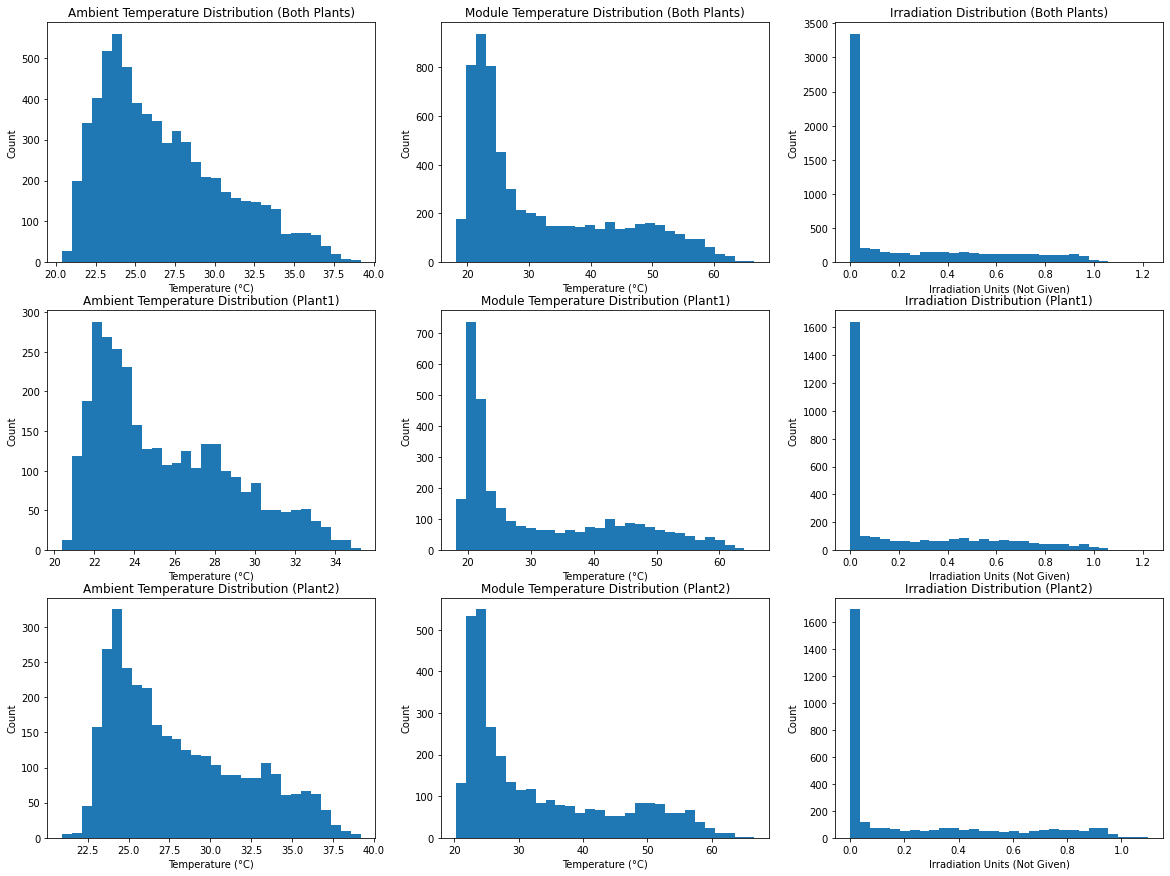

In [28]:
n_bins = 30

fig, ax = plt.subplots(3, 3, figsize=(20,15))

ax[0,0].hist(wea_df['AMBIENT_TEMPERATURE'], density=False, bins=n_bins)
ax[0,0].set_title('Ambient Temperature Distribution (Both Plants)')
ax[0,0].set(xlabel='Temperature (°C)', ylabel='Count')
ax[0,1].hist(wea_df['MODULE_TEMPERATURE'], density=False, bins=n_bins)
ax[0,1].set_title('Module Temperature Distribution (Both Plants)')
ax[0,1].set(xlabel='Temperature (°C)', ylabel='Count')
ax[0,2].hist(wea_df['IRRADIATION'], density=False, bins=n_bins)
ax[0,2].set_title('Irradiation Distribution (Both Plants)')
ax[0,2].set(xlabel='Irradiation Units (Not Given)', ylabel='Count')

p1_wea_df = wea_df[wea_df['PLANT_ID'] == 4135001]

ax[1,0].hist(p1_wea_df['AMBIENT_TEMPERATURE'], density=False, bins=n_bins)
ax[1,0].set_title('Ambient Temperature Distribution (Plant1)')
ax[1,0].set(xlabel='Temperature (°C)', ylabel='Count')
ax[1,1].hist(p1_wea_df['MODULE_TEMPERATURE'], density=False, bins=n_bins)
ax[1,1].set_title('Module Temperature Distribution (Plant1)')
ax[1,1].set(xlabel='Temperature (°C)', ylabel='Count')
ax[1,2].hist(p1_wea_df['IRRADIATION'], density=False, bins=n_bins)
ax[1,2].set_title('Irradiation Distribution (Plant1)')
ax[1,2].set(xlabel='Irradiation Units (Not Given)', ylabel='Count')

p2_wea_df = wea_df[wea_df['PLANT_ID'] == 4136001]

ax[2,0].hist(p2_wea_df['AMBIENT_TEMPERATURE'], density=False, bins=n_bins)
ax[2,0].set_title('Ambient Temperature Distribution (Plant2)')
ax[2,0].set(xlabel='Temperature (°C)', ylabel='Count')
ax[2,1].hist(p2_wea_df['MODULE_TEMPERATURE'], density=False, bins=n_bins)
ax[2,1].set_title('Module Temperature Distribution (Plant2)')
ax[2,1].set(xlabel='Temperature (°C)', ylabel='Count')
ax[2,2].hist(p2_wea_df['IRRADIATION'], density=False, bins=n_bins)
ax[2,2].set_title('Irradiation Distribution (Plant2)')
ax[2,2].set(xlabel='Irradiation Units (Not Given)', ylabel='Count');

Energy generation distributions.

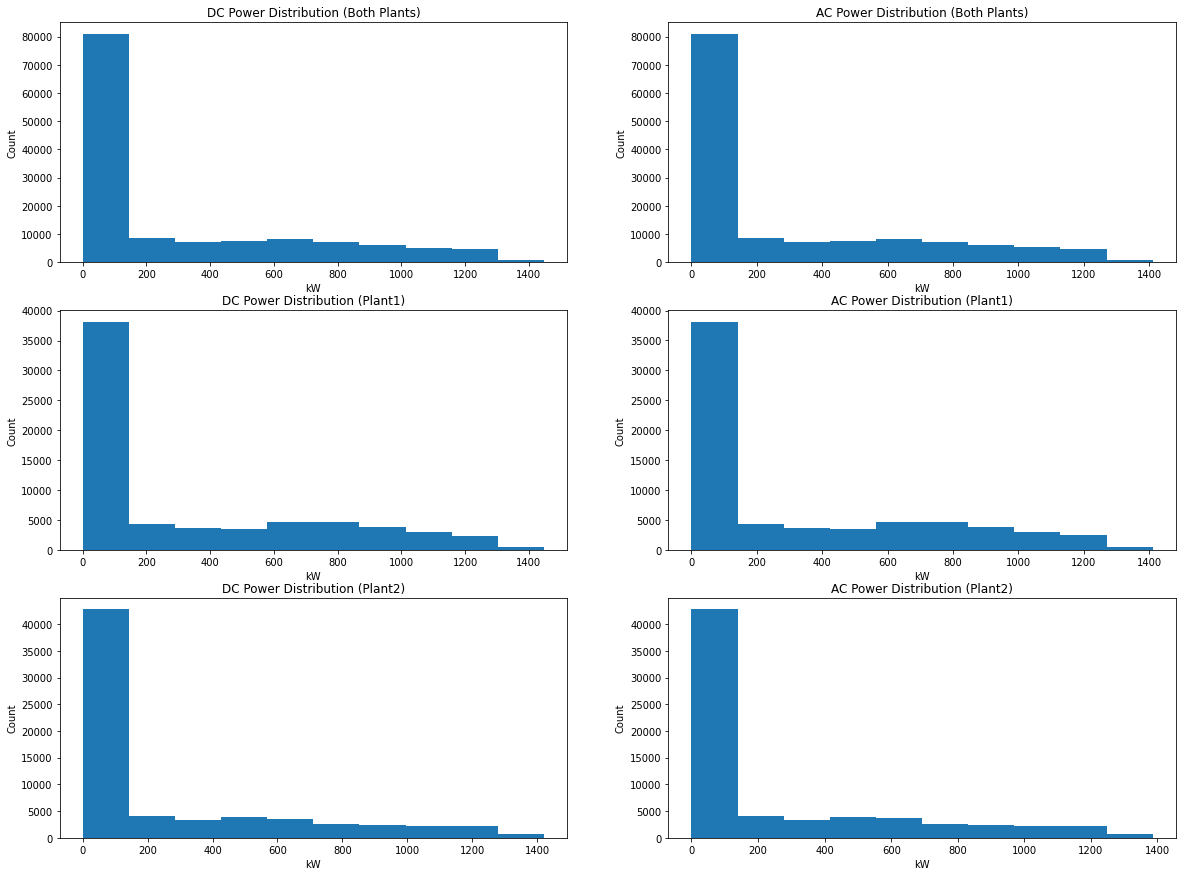

In [29]:
n_bins = 10

fig, ax = plt.subplots(3, 2, figsize=(20,15))

ax[0,0].hist(gen_df['DC_POWER'], density=False, bins=n_bins)
ax[0,0].set_title('DC Power Distribution (Both Plants)')
ax[0,0].set(xlabel='kW', ylabel='Count')
ax[0,1].hist(gen_df['AC_POWER'], density=False, bins=n_bins)
ax[0,1].set_title('AC Power Distribution (Both Plants)')
ax[0,1].set(xlabel='kW', ylabel='Count')

p1_gen_df = gen_df[gen_df['PLANT_ID'] == 4135001]

ax[1,0].hist(p1_gen_df['DC_POWER'], density=False, bins=n_bins)
ax[1,0].set_title('DC Power Distribution (Plant1)')
ax[1,0].set(xlabel='kW', ylabel='Count')
ax[1,1].hist(p1_gen_df['AC_POWER'], density=False, bins=n_bins)
ax[1,1].set_title('AC Power Distribution (Plant1)')
ax[1,1].set(xlabel='kW', ylabel='Count')

p2_gen_df = gen_df[gen_df['PLANT_ID'] == 4136001]

ax[2,0].hist(p2_gen_df['DC_POWER'], density=False, bins=n_bins)
ax[2,0].set_title('DC Power Distribution (Plant2)')
ax[2,0].set(xlabel='kW', ylabel='Count')
ax[2,1].hist(p2_gen_df['AC_POWER'], density=False, bins=n_bins)
ax[2,1].set_title('AC Power Distribution (Plant2)')
ax[2,1].set(xlabel='kW', ylabel='Count');

#### f) Trends <a class="anchor" id="dataset-trends"></a>

DC & AC Power at different hours of the day.

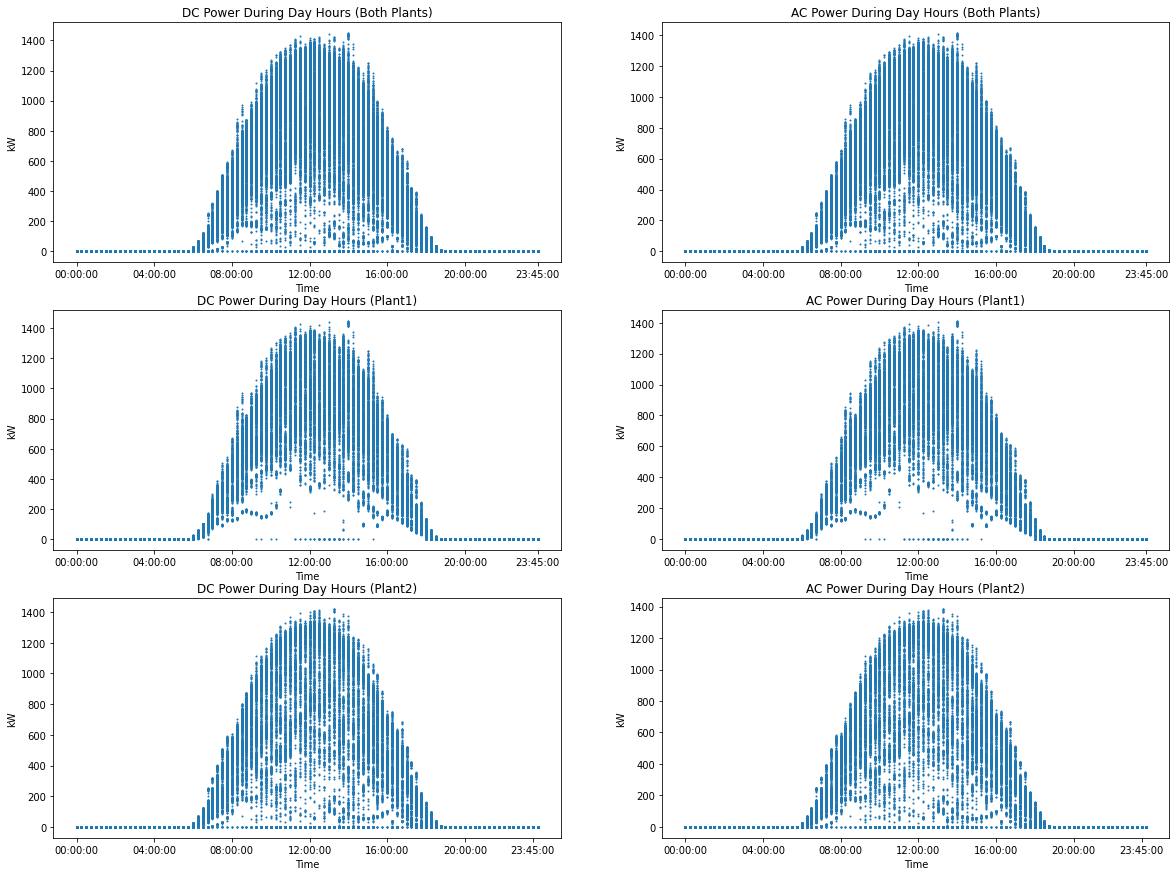

In [30]:
fig, ax = plt.subplots(3, 2, figsize=(20,15))

ax[0,0].scatter(gen_df['DATE_TIME'].str.split(expand=True)[1], gen_df['DC_POWER'], s=1)
ax[0,0].set(xlabel='Time', ylabel='kW')
ax[0,0].set_title('DC Power During Day Hours (Both Plants)')
ax[0,0].set_xticks(['00:00:00', '04:00:00', '08:00:00', '12:00:00', '16:00:00', '20:00:00', '23:45:00'])
ax[0,1].scatter(gen_df['DATE_TIME'].str.split(expand=True)[1], gen_df['AC_POWER'], s=1)
ax[0,1].set(xlabel='Time', ylabel='kW')
ax[0,1].set_title('AC Power During Day Hours (Both Plants)')
ax[0,1].set_xticks(['00:00:00', '04:00:00', '08:00:00', '12:00:00', '16:00:00', '20:00:00', '23:45:00'])

ax[1,0].scatter(p1_gen_df['DATE_TIME'].str.split(expand=True)[1], p1_gen_df['DC_POWER'], s=1)
ax[1,0].set(xlabel='Time', ylabel='kW')
ax[1,0].set_title('DC Power During Day Hours (Plant1)')
ax[1,0].set_xticks(['00:00:00', '04:00:00', '08:00:00', '12:00:00', '16:00:00', '20:00:00', '23:45:00'])
ax[1,1].scatter(p1_gen_df['DATE_TIME'].str.split(expand=True)[1], p1_gen_df['AC_POWER'], s=1)
ax[1,1].set(xlabel='Time', ylabel='kW')
ax[1,1].set_title('AC Power During Day Hours (Plant1)')
ax[1,1].set_xticks(['00:00:00', '04:00:00', '08:00:00', '12:00:00', '16:00:00', '20:00:00', '23:45:00'])

ax[2,0].scatter(p2_gen_df['DATE_TIME'].str.split(expand=True)[1], p2_gen_df['DC_POWER'], s=1)
ax[2,0].set(xlabel='Time', ylabel='kW')
ax[2,0].set_title('DC Power During Day Hours (Plant2)')
ax[2,0].set_xticks(['00:00:00', '04:00:00', '08:00:00', '12:00:00', '16:00:00', '20:00:00', '23:45:00'])
ax[2,1].scatter(p2_gen_df['DATE_TIME'].str.split(expand=True)[1], p2_gen_df['AC_POWER'], s=1)
ax[2,1].set(xlabel='Time', ylabel='kW')
ax[2,1].set_title('AC Power During Day Hours (Plant2)')
ax[2,1].set_xticks(['00:00:00', '04:00:00', '08:00:00', '12:00:00', '16:00:00', '20:00:00', '23:45:00']);

DC & AC power over time. Notice the cyclical pattern. Makes after seeing DC & AC power peaking around noon via the graphs above. We'd expect to see a peak each day.

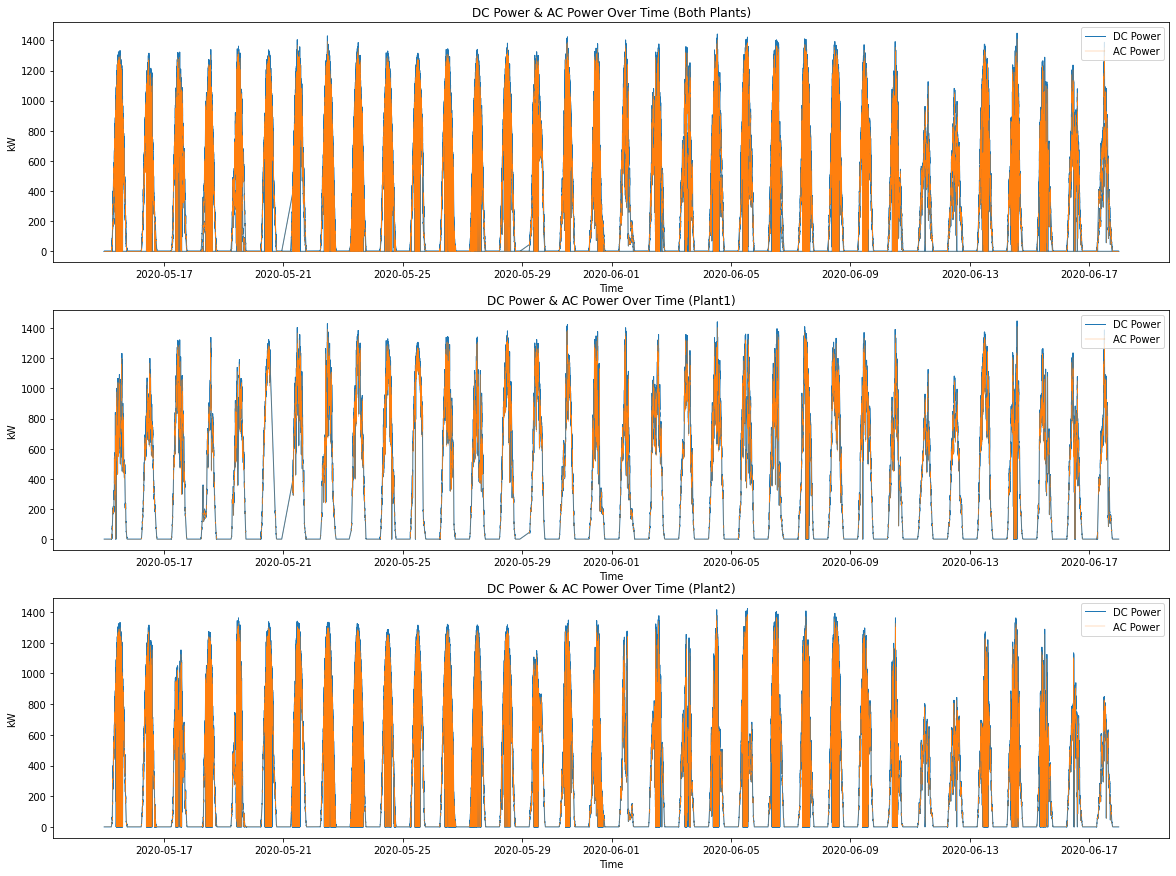

In [31]:
fig, ax = plt.subplots(3, 1, figsize=(20,15))

ax[0].plot(gen_df['DATE_TIME_DT'], gen_df['DC_POWER'], lw=1, label="DC Power")
ax[0].plot(gen_df['DATE_TIME_DT'], gen_df['AC_POWER'], lw=0.25, label="AC Power")
ax[0].set_title('DC Power & AC Power Over Time (Both Plants)')
ax[0].set(xlabel='Time', ylabel='kW')
ax[0].legend(loc='upper right')

ax[1].plot(p1_gen_df['DATE_TIME_DT'], p1_gen_df['DC_POWER'], lw=1, label="DC Power")
ax[1].plot(p1_gen_df['DATE_TIME_DT'], p1_gen_df['AC_POWER'], lw=0.25, label="AC Power")
ax[1].set_title('DC Power & AC Power Over Time (Plant1)')
ax[1].set(xlabel='Time', ylabel='kW')
ax[1].legend(loc='upper right')

ax[2].plot(p2_gen_df['DATE_TIME_DT'], p2_gen_df['DC_POWER'], lw=1, label="DC Power")
ax[2].plot(p2_gen_df['DATE_TIME_DT'], p2_gen_df['AC_POWER'], lw=0.25, label="AC Power")
ax[2].set_title('DC Power & AC Power Over Time (Plant2)')
ax[2].set(xlabel='Time', ylabel='kW')
ax[2].legend(loc='upper right');

Weather sensor data at different hours of the day.

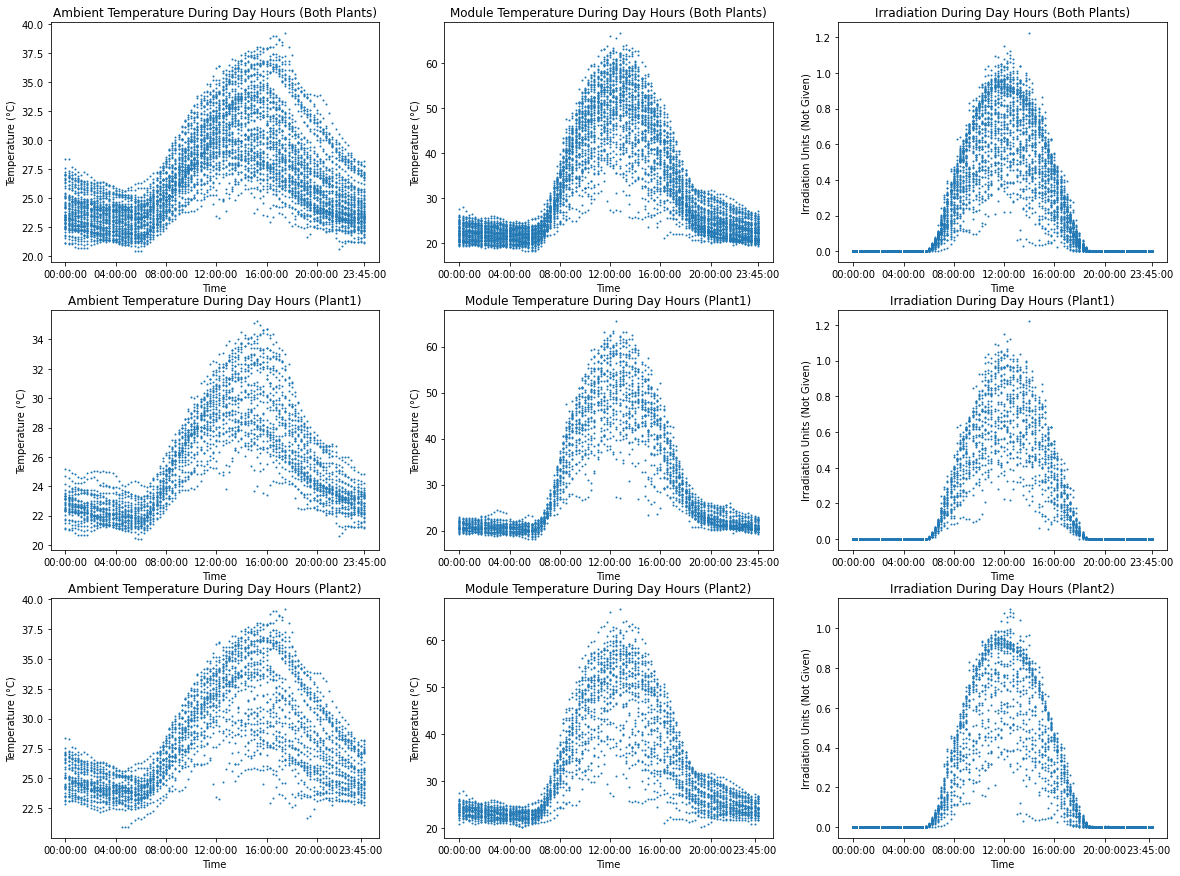

In [32]:
fig, ax = plt.subplots(3, 3, figsize=(20,15))

ax[0,0].scatter(wea_df['DATE_TIME'].str.split(expand=True)[1], wea_df['AMBIENT_TEMPERATURE'], s=1)
ax[0,0].set(xlabel='Time', ylabel='Temperature (°C)')
ax[0,0].set_title('Ambient Temperature During Day Hours (Both Plants)')
ax[0,0].set_xticks(['00:00:00', '04:00:00', '08:00:00', '12:00:00', '16:00:00', '20:00:00', '23:45:00'])
ax[0,1].scatter(wea_df['DATE_TIME'].str.split(expand=True)[1], wea_df['MODULE_TEMPERATURE'], s=1)
ax[0,1].set(xlabel='Time', ylabel='Temperature (°C)')
ax[0,1].set_title('Module Temperature During Day Hours (Both Plants)')
ax[0,1].set_xticks(['00:00:00', '04:00:00', '08:00:00', '12:00:00', '16:00:00', '20:00:00', '23:45:00'])
ax[0,2].scatter(wea_df['DATE_TIME'].str.split(expand=True)[1], wea_df['IRRADIATION'], s=1)
ax[0,2].set(xlabel='Time', ylabel='Irradiation Units (Not Given)')
ax[0,2].set_title('Irradiation During Day Hours (Both Plants)')
ax[0,2].set_xticks(['00:00:00', '04:00:00', '08:00:00', '12:00:00', '16:00:00', '20:00:00', '23:45:00'])

ax[1,0].scatter(p1_wea_df['DATE_TIME'].str.split(expand=True)[1], p1_wea_df['AMBIENT_TEMPERATURE'], s=1)
ax[1,0].set(xlabel='Time', ylabel='Temperature (°C)')
ax[1,0].set_title('Ambient Temperature During Day Hours (Plant1)')
ax[1,0].set_xticks(['00:00:00', '04:00:00', '08:00:00', '12:00:00', '16:00:00', '20:00:00', '23:45:00'])
ax[1,1].scatter(p1_wea_df['DATE_TIME'].str.split(expand=True)[1], p1_wea_df['MODULE_TEMPERATURE'], s=1)
ax[1,1].set(xlabel='Time', ylabel='Temperature (°C)')
ax[1,1].set_title('Module Temperature During Day Hours (Plant1)')
ax[1,1].set_xticks(['00:00:00', '04:00:00', '08:00:00', '12:00:00', '16:00:00', '20:00:00', '23:45:00'])
ax[1,2].scatter(p1_wea_df['DATE_TIME'].str.split(expand=True)[1], p1_wea_df['IRRADIATION'], s=1)
ax[1,2].set(xlabel='Time', ylabel='Irradiation Units (Not Given)')
ax[1,2].set_title('Irradiation During Day Hours (Plant1)')
ax[1,2].set_xticks(['00:00:00', '04:00:00', '08:00:00', '12:00:00', '16:00:00', '20:00:00', '23:45:00'])

ax[2,0].scatter(p2_wea_df['DATE_TIME'].str.split(expand=True)[1], p2_wea_df['AMBIENT_TEMPERATURE'], s=1)
ax[2,0].set(xlabel='Time', ylabel='Temperature (°C)')
ax[2,0].set_title('Ambient Temperature During Day Hours (Plant2)')
ax[2,0].set_xticks(['00:00:00', '04:00:00', '08:00:00', '12:00:00', '16:00:00', '20:00:00', '23:45:00'])
ax[2,1].scatter(p2_wea_df['DATE_TIME'].str.split(expand=True)[1], p2_wea_df['MODULE_TEMPERATURE'], s=1)
ax[2,1].set(xlabel='Time', ylabel='Temperature (°C)')
ax[2,1].set_title('Module Temperature During Day Hours (Plant2)')
ax[2,1].set_xticks(['00:00:00', '04:00:00', '08:00:00', '12:00:00', '16:00:00', '20:00:00', '23:45:00'])
ax[2,2].scatter(p2_wea_df['DATE_TIME'].str.split(expand=True)[1], p2_wea_df['IRRADIATION'], s=1)
ax[2,2].set(xlabel='Time', ylabel='Irradiation Units (Not Given)')
ax[2,2].set_title('Irradiation During Day Hours (Plant2)')
ax[2,2].set_xticks(['00:00:00', '04:00:00', '08:00:00', '12:00:00', '16:00:00', '20:00:00', '23:45:00']);

#### g) Relationships Between Variables <a class="anchor" id="dataset-relationships-between-variables"></a>

Just by looking at some of the visuals in the trends section, when looking at the plant generation data over hours of the day compared to weather sensor data over hours of the day, one can see similarities in peak times--especially when looking at module temperature & irradiation. I would suspect some strong correlation here just by look at the graphs, but let's calculate correlation to get a better understanding.

In [33]:
merged_inner = pd.merge(left=gen_df, right=wea_df, how='inner', left_on=['PLANT_ID','DATE_TIME_DT'], right_on=['PLANT_ID','DATE_TIME_DT'])
merged_inner.drop(columns=['DATE_TIME_y', 'YEAR_y', 'MONTH_y', 'DAY_y', 'TIME_y'], inplace=True)
merged_inner.rename(columns={"DATE_TIME_x": "DATE_TIME", "YEAR_x": "YEAR", "MONTH_x": "MONTH", "DAY_x": "DAY", "TIME_x": "TIME"}, inplace=True)
print(merged_inner.shape)
# merged_inner.head()
merged_inner.corr()

(136472, 16)


,PLANT_ID,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,YEAR,MONTH,DAY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
PLANT_ID,1.000000,-0.087404,-0.087457,-0.000156,0.535633,NaN,0.011179,-0.013591,0.311516,0.057702,-0.005072
DC_POWER,-0.087404,1.000000,0.999996,0.047109,-0.044250,NaN,-0.058626,0.048531,0.574090,0.852346,0.884893
AC_POWER,-0.087457,0.999996,1.000000,0.046990,-0.044275,NaN,-0.058497,0.048454,0.574222,0.852363,0.884799
DAILY_YIELD,-0.000156,0.047109,0.046990,1.000000,-0.039250,NaN,-0.025890,0.030053,0.373862,0.129203,-0.011747
TOTAL_YIELD,0.535633,-0.044250,-0.044275,-0.039250,1.000000,NaN,-0.013080,0.010266,0.168550,0.028274,-0.006764
YEAR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MONTH,0.011179,-0.058626,-0.058497,-0.025890,-0.013080,NaN,1.000000,-0.815191,-0.287801,-0.149434,-0.069274
DAY,-0.013591,0.048531,0.048454,0.030053,0.010266,NaN,-0.815191,1.000000,0.227210,0.116593,0.048207
AMBIENT_TEMPERATURE,0.311516,0.574090,0.574222,0.373862,0.168550,NaN,-0.287801,0.227210,1.000000,0.818940,0.657952
MODULE_TEMPERATURE,0.057702,0.852346,0.852363,0.129203,0.028274,NaN,-0.149434,0.116593,0.818940,1.000000,0.951085


In [34]:
p1_merged_inner = merged_inner[merged_inner['PLANT_ID'] == 4135001]
p2_merged_inner = merged_inner[merged_inner['PLANT_ID'] == 4136001]

Let's also look at the correlation for each individual plant starting with Plant1.

In [35]:
p1_merged_inner.corr()

,PLANT_ID,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,YEAR,MONTH,DAY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
PLANT_ID,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DC_POWER,NaN,1.000000,0.999996,0.082243,0.003851,NaN,-0.037610,0.033072,0.724668,0.954811,0.989391
AC_POWER,NaN,0.999996,1.000000,0.082193,0.003840,NaN,-0.037525,0.032997,0.724903,0.954924,0.989340
DAILY_YIELD,NaN,0.082243,0.082193,1.000000,0.009896,NaN,-0.012959,0.019999,0.478496,0.198308,0.078317
TOTAL_YIELD,NaN,0.003851,0.003840,0.009896,1.000000,NaN,0.149765,-0.072982,-0.036150,-0.015596,-0.005490
YEAR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MONTH,NaN,-0.037610,-0.037525,-0.012959,0.149765,NaN,1.000000,-0.818558,-0.251767,-0.120589,-0.045356
DAY,NaN,0.033072,0.032997,0.019999,-0.072982,NaN,-0.818558,1.000000,0.197085,0.103638,0.038740
AMBIENT_TEMPERATURE,NaN,0.724668,0.724903,0.478496,-0.036150,NaN,-0.251767,0.197085,1.000000,0.855420,0.725278
MODULE_TEMPERATURE,NaN,0.954811,0.954924,0.198308,-0.015596,NaN,-0.120589,0.103638,0.855420,1.000000,0.961511


And now Plant2 individually.

In [36]:
p2_merged_inner.corr()

,PLANT_ID,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,YEAR,MONTH,DAY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
PLANT_ID,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DC_POWER,NaN,1.000000,0.999997,0.005593,0.004528,NaN,-0.080431,0.063663,0.563232,0.749676,0.780978
AC_POWER,NaN,0.999997,1.000000,0.005395,0.004533,NaN,-0.080248,0.063580,0.563324,0.749604,0.780851
DAILY_YIELD,NaN,0.005593,0.005395,1.000000,-0.068472,NaN,-0.040094,0.041133,0.321785,0.046787,-0.107987
TOTAL_YIELD,NaN,0.004528,0.004533,-0.068472,1.000000,NaN,-0.032167,0.029593,0.002774,-0.004646,-0.006720
YEAR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MONTH,NaN,-0.080431,-0.080248,-0.040094,-0.032167,NaN,1.000000,-0.811705,-0.355423,-0.183838,-0.092924
DAY,NaN,0.063663,0.063580,0.041133,0.029593,NaN,-0.811705,1.000000,0.285063,0.133412,0.057505
AMBIENT_TEMPERATURE,NaN,0.563232,0.563324,0.321785,0.002774,NaN,-0.355423,0.285063,1.000000,0.848976,0.671998
MODULE_TEMPERATURE,NaN,0.749676,0.749604,0.046787,-0.004646,NaN,-0.183838,0.133412,0.848976,1.000000,0.947057


**Observations:**

We notice a **strong positive** correlation between the following:

- DC_POWER to AC_POWER
- AMBIENT_TEMPERATURE to MODULE_TEMPERATURE
- IRRADIATION to MODULE_TEMPERATURE
- MODULE_TEMPERATURE to DC_POWER & AC_POWER
- IRRADIATION to DC_POWER & AC_POWER

We notice a **moderate positive** correlation between the following:

- AMBIENT_TEMPERATURE to DC_POWER & AC_POWER
- AMBIENT_TEMPERATURE to IRRADIATION

We notice a **weak positive** correlation between the following:

- AMBIENT_TEMPERATURE to DAY (of the month)

<hr>

## 3. Identify 1-3 research questions and perform analysis <a class="anchor" id="step3"></a>

### a) Research Questions <a class="anchor" id="research-questions"></a>

1. Can one identify poor performing equipment (inverters) for maintenance/replacement?
2. Can one use regression to predict energy generation for a day given temperature and irradiance?

### b) Analysis <a class="anchor" id="research-questions-analysis"></a>

#### Can one identify poor performing equipment (inverters) for maintenance/replacement?

First, we must define what poor performing equipment refers to. To start, the equipment that we will be focused on are the inverters. To analyze their performance, we will look mean DC_POWER compared to other inverters at their respective plant as well as higher loss percentages in the DC_POWER to AC_POWER conversion step. 0 reads will be included in the mean, in the case that equipment wasn't reading when it should've been.

In [37]:
gen_df_cpy = gen_df.copy()
gen_df_cpy['LOSS_PERC'] = (1 - (gen_df_cpy['AC_POWER'] / gen_df_cpy['DC_POWER']))*100
inverter_mean = gen_df_cpy.groupby('SOURCE_KEY').mean()
inverter_mean = inverter_mean[['PLANT_ID', 'DC_POWER', 'AC_POWER', 'LOSS_PERC']]
inverter_mean

,PLANT_ID,DC_POWER,AC_POWER,LOSS_PERC
SOURCE_KEY,,,,
1BY6WEcLGh8j5v7,4135001.0,287.372098,281.124073,2.271185
1IF53ai7Xc0U56Y,4135001.0,322.633677,315.488026,2.283398
3PZuoBAID5Wc2HD,4135001.0,322.101567,314.967354,2.285609
4UPUqMRk7TRMgml,4136001.0,277.760524,271.576886,2.327273
7JYdWkrLSPkdwr4,4135001.0,313.289196,306.385671,2.278609
81aHJ1q11NBPMrL,4136001.0,230.796317,225.728343,2.319932
9kRcWv60rDACzjR,4136001.0,244.653027,239.281783,2.320942
Et9kgGMDl729KT4,4136001.0,188.230376,184.230269,2.307572
IQ2d7wF4YD8zU1Q,4136001.0,285.525112,279.190055,2.324292


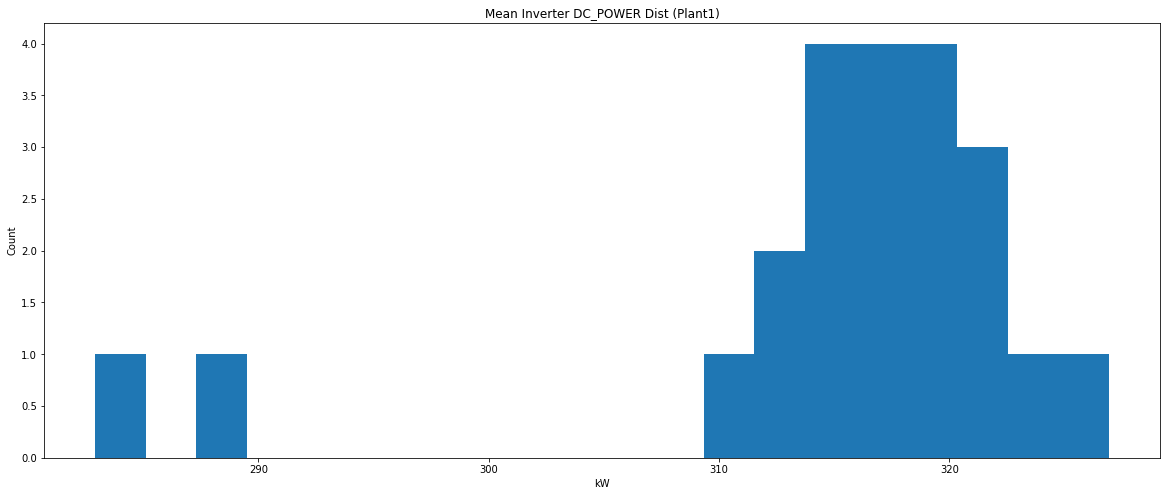

In [38]:
p1_sorted = inverter_mean[inverter_mean['PLANT_ID'] == 4135001].sort_values(by='DC_POWER')

n_bins = 20

fig, ax = plt.subplots(figsize=(20,8))

ax.hist(p1_sorted['DC_POWER'], density=False, bins=n_bins)
ax.set_title('Mean Inverter DC_POWER Dist (Plant1)')
ax.set(xlabel='kW', ylabel='Count');

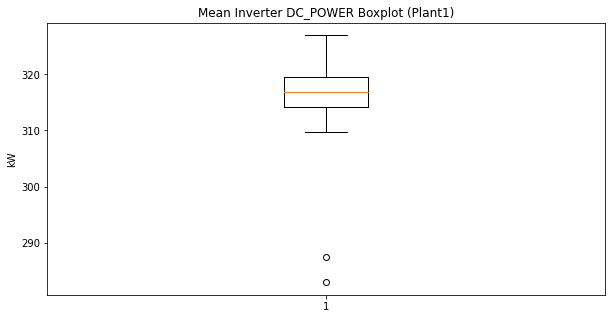

In [39]:
fig, ax = plt.subplots(figsize=(10,5))

ax.boxplot(p1_sorted['DC_POWER'])
ax.set_title('Mean Inverter DC_POWER Boxplot (Plant1)');
ax.set(ylabel='kW');

In [40]:
p1_sorted.head()

,PLANT_ID,DC_POWER,AC_POWER,LOSS_PERC
SOURCE_KEY,,,,
bvBOhCH3iADSZry,4135001.0,282.899829,276.778938,2.266690
1BY6WEcLGh8j5v7,4135001.0,287.372098,281.124073,2.271185
ih0vzX44oOqAx2f,4135001.0,309.771416,302.962438,2.277585
7JYdWkrLSPkdwr4,4135001.0,313.289196,306.385671,2.278609
z9Y9gH1T5YWrNuG,4135001.0,313.403774,306.492026,2.282335


There are 2 inverters in Plant1 that have an usually low mean DC_POWER compared to the others and would be considered outliers:
- bvBOhCH3iADSZry
- 1BY6WEcLGh8j5v7

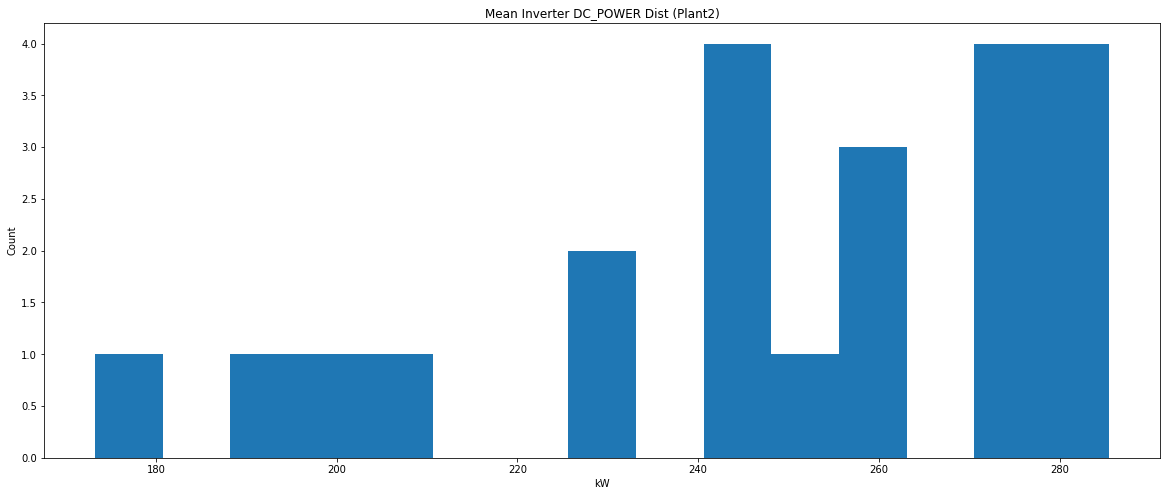

In [41]:
p2_sorted = inverter_mean[inverter_mean['PLANT_ID'] == 4136001].sort_values(by='DC_POWER')

n_bins = 15

fig, ax = plt.subplots(figsize=(20,8))

ax.hist(p2_sorted['DC_POWER'], density=False, bins=n_bins)
ax.set_title('Mean Inverter DC_POWER Dist (Plant2)')
ax.set(xlabel='kW', ylabel='Count');

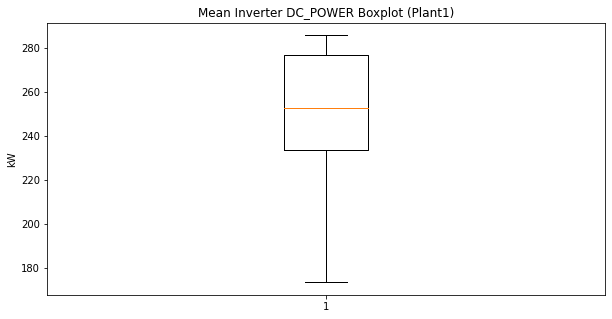

In [42]:
fig, ax = plt.subplots(figsize=(10,5))

ax.boxplot(p2_sorted['DC_POWER'])
ax.set_title('Mean Inverter DC_POWER Boxplot (Plant1)')
ax.set(ylabel='kW');

Mean DC_POWER of the inverters at Plant2 are a bit more scattered and have a wider range. One must keep in mind that the DC_POWER value comes from the solar panels connected to the inverter. The placement and angle of those solar panels over time can drastically affect the DC_POWER value. With that in mind, we do not see any outliers and will not consider any of these values as unusual.

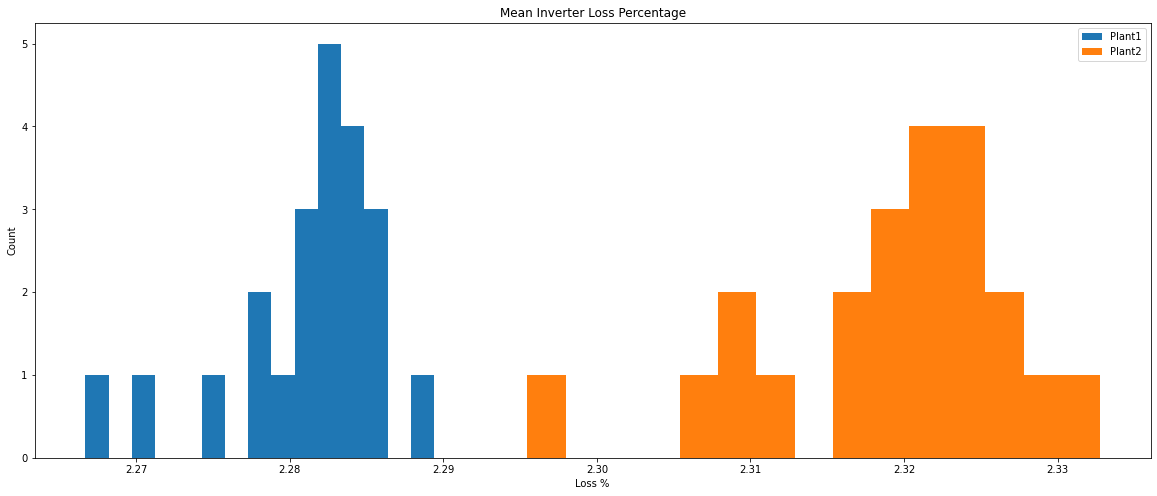

In [43]:
inverter_mean_sorted = inverter_mean.sort_values(by='LOSS_PERC')

p1 = inverter_mean_sorted[inverter_mean_sorted['PLANT_ID'] == 4135001]
p2 = inverter_mean_sorted[inverter_mean_sorted['PLANT_ID'] == 4136001]

n_bins = 15

fig, ax = plt.subplots(figsize=(20,8))

ax.hist(p1['LOSS_PERC'], density=False, bins=n_bins, label="Plant1")
ax.hist(p2['LOSS_PERC'], density=False, bins=n_bins, label="Plant2")
ax.set_title('Mean Inverter Loss Percentage')
ax.set(xlabel='Loss %', ylabel='Count');
ax.legend(loc='upper right');

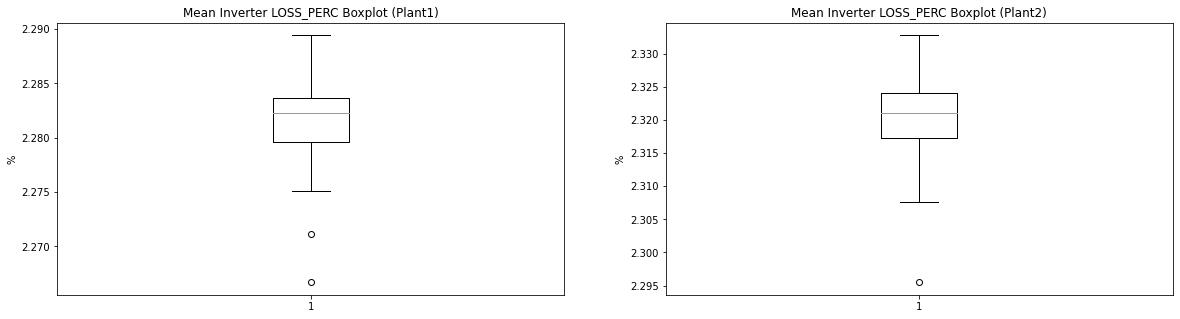

In [44]:
fig, ax = plt.subplots(1, 2, figsize=(20,5))

ax[0].boxplot(p1['LOSS_PERC'])
ax[0].set_title('Mean Inverter LOSS_PERC Boxplot (Plant1)')
ax[0].set(ylabel='%');

ax[1].boxplot(p2['LOSS_PERC'])
ax[1].set_title('Mean Inverter LOSS_PERC Boxplot (Plant2)')
ax[1].set(ylabel='%');

In [45]:
p1.head()

,PLANT_ID,DC_POWER,AC_POWER,LOSS_PERC
SOURCE_KEY,,,,
bvBOhCH3iADSZry,4135001.0,282.899829,276.778938,2.266690
1BY6WEcLGh8j5v7,4135001.0,287.372098,281.124073,2.271185
sjndEbLyjtCKgGv,4135001.0,314.827045,307.912265,2.275118
ih0vzX44oOqAx2f,4135001.0,309.771416,302.962438,2.277585
7JYdWkrLSPkdwr4,4135001.0,313.289196,306.385671,2.278609


In [46]:
p2.head()

,PLANT_ID,DC_POWER,AC_POWER,LOSS_PERC
SOURCE_KEY,,,,
Quc1TzYxW2pYoWX,4136001.0,173.254729,169.644735,2.295474
Et9kgGMDl729KT4,4136001.0,188.230376,184.230269,2.307572
rrq4fwE8jgrTyWY,4136001.0,209.158443,204.664730,2.308926
q49J1IKaHRwDQnt,4136001.0,226.161981,221.252177,2.308945
LYwnQax7tkwH5Cb,4136001.0,196.286078,192.090443,2.312759


When analyzing the mean loss percentage of the inverter in their DC_POWER to AC_POWER conversion step we see the following outliers at the plants:

Plant1 (same inverters identified from before):
- bvBOhCH3iADSZry
- 1BY6WEcLGh8j5v7

Plant2:
- Quc1TzYxW2pYoWX

This does not mean that those inverters are necessarily having issues/broken. Since they have abnormally low loss percentages compared to the others, they could actually be considered as outperforming their respectiver counterparts; however, they should be considered as "inverters for follow up."

#### Can one use regression to predict energy generation for a day given temperature and irradiance?

For the sake of this question, we will be referring to energy generation as AC_POWER.

In [47]:
# First let's created an interval lookup table, giving an int index to each time period
intervals = p1_wea_df['TIME'].unique()
intervals

added_index = [np.append(enum, index) for index, enum in enumerate(intervals)]
interval_lookup = pd.DataFrame(added_index, columns=['TIME', 'TIME_INTERVAL_ID'])
interval_lookup['TIME_INTERVAL_ID'] = interval_lookup['TIME_INTERVAL_ID'].astype(int)
interval_lookup

,TIME,TIME_INTERVAL_ID
0,00:00:00,0
1,00:15:00,1
2,00:30:00,2
3,00:45:00,3
4,01:00:00,4
...,...,...
91,22:45:00,91
92,23:00:00,92
93,23:15:00,93
94,23:30:00,94


In [48]:
# group generation data by PLANT_ID and DATE_TIME_DT for interval read by whole plant and not inverter level
gen_df_by_plant = gen_df.groupby(['PLANT_ID', 'DATE_TIME_DT']).sum()
gen_df_by_plant.reset_index(inplace=True)
gen_df_by_plant.drop(columns=['DAILY_YIELD', 'TOTAL_YIELD', 'YEAR', 'MONTH', 'DAY'], inplace=True)

# join with weather sensor data intervals
merged_inner_grouped = pd.merge(left=gen_df_by_plant, right=wea_df, how='inner', left_on=['PLANT_ID','DATE_TIME_DT'], right_on=['PLANT_ID','DATE_TIME_DT'])

# clean up
merged_inner_grouped.drop(columns=['SOURCE_KEY'], inplace=True)

# join with time lookup
merged_inner_grouped = pd.merge(left=merged_inner_grouped, right=interval_lookup, how='inner', left_on=['TIME'], right_on=['TIME'])

In [49]:
merged_inner_grouped.head()

,PLANT_ID,DATE_TIME_DT,DC_POWER,AC_POWER,DATE_TIME,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,YEAR,MONTH,DAY,TIME,TIME_INTERVAL_ID
0,4135001,2020-05-15,0.0,0.0,2020-05-15 00:00:00,25.184316,22.857507,0.0,2020,5,15,00:00:00,0
1,4135001,2020-05-17,0.0,0.0,2020-05-17 00:00:00,24.170166,21.631490,0.0,2020,5,17,00:00:00,0
2,4135001,2020-05-18,0.0,0.0,2020-05-18 00:00:00,21.155691,20.599400,0.0,2020,5,18,00:00:00,0
3,4135001,2020-05-19,0.0,0.0,2020-05-19 00:00:00,22.610982,20.609906,0.0,2020,5,19,00:00:00,0
4,4135001,2020-05-20,0.0,0.0,2020-05-20 00:00:00,22.465285,20.111123,0.0,2020,5,20,00:00:00,0


In [50]:
merged_inner_grouped.describe().T

,count,mean,std,min,25%,50%,75%,max
PLANT_ID,6416.0,4.135509e+06,499.975776,4.135001e+06,4.135001e+06,4.136001e+06,4.136001e+06,4.136001e+06
DC_POWER,6416.0,5.976563e+03,7752.691215,0.000000e+00,0.000000e+00,6.608952e+02,1.216031e+04,2.989378e+04
AC_POWER,6416.0,5.844946e+03,7576.958173,0.000000e+00,0.000000e+00,6.384738e+02,1.189846e+04,2.915021e+04
AMBIENT_TEMPERATURE,6416.0,2.683477e+01,3.934008,2.039850e+01,2.367318e+01,2.597393e+01,2.936660e+01,3.918164e+01
MODULE_TEMPERATURE,6416.0,3.198662e+01,11.836145,1.814042e+01,2.246663e+01,2.647802e+01,4.093247e+01,6.663595e+01
IRRADIATION,6416.0,2.314410e-01,0.307142,0.000000e+00,0.000000e+00,2.358190e-02,4.455864e-01,1.221652e+00
YEAR,6416.0,2.020000e+03,0.000000,2.020000e+03,2.020000e+03,2.020000e+03,2.020000e+03,2.020000e+03
MONTH,6416.0,5.507949e+00,0.499976,5.000000e+00,5.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00
DAY,6416.0,1.589526e+01,8.551268,1.000000e+00,9.000000e+00,1.600000e+01,2.300000e+01,3.100000e+01
TIME_INTERVAL_ID,6416.0,4.773099e+01,27.605222,0.000000e+00,2.400000e+01,4.800000e+01,7.200000e+01,9.500000e+01


In [51]:
features = ['PLANT_ID', 'YEAR', 'MONTH', 'DAY', 'TIME_INTERVAL_ID', 'AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE', 'IRRADIATION']
target = ['AC_POWER']

X_input = merged_inner_grouped[features]
y_target = merged_inner_grouped[target]

X_train, X_test, y_train, y_test = train_test_split(X_input, y_target, test_size=0.20, random_state=324)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(5132, 8)
(5132, 1)
(1284, 8)
(1284, 1)


In [52]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)
print(regressor.score(X_train, y_train))

0.9060002855711967


In [53]:
y_prediction = regressor.predict(X_test)
y_prediction
RMSE = sqrt(mean_squared_error(y_true = y_test, y_pred = y_prediction))
print(RMSE)

2581.288194483196


The prediction above will give us predicted AC_POWER generated at each 15-minute interval for each plant. If one were to receive predicted weather sensor data (AMBIENT_TEMPERATURE, MODULE_TEMPERATURE, IRRADIATION), one could then use that predicted weather sensor data to then predict the solar generation data.

<hr>

## 4. Findings <a class="anchor" id="findings"></a>

### Findings Summarized

1. Solar generation data is cyclical.
2. Solar generation data is highly correlated to weather data--especially irradiation from the sun
3. With the data provided, it's difficult to identify "poor" performing equipment and/or "faulty" equipment; however, we can set some criterium to look for outliers and classify inverters for "follow-up needed" (see identified inverters below):  
&nbsp;&nbsp;&nbsp;&nbsp;Plant1:  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;- bvBOhCH3iADSZry  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;- 1BY6WEcLGh8j5v7  
&nbsp;&nbsp;&nbsp;&nbsp;Plant2:  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;- Quc1TzYxW2pYoWX  
4. Solar generation data CAN be predicted by linear regression given weather sensor data. Going forward, if one could receive predicted weather sensor data, one could then predict solar generation for the future.

### Assumptions

Some assumptions were made when analyzing the data for poor performing equipment. We assumed it was the inverter that caused any irregularities; however, there are additional pieces of hardware that could be causing irregularities--including the solar panels themselves. We also made the assumption of using AC_POWER in our solar generation prediction. In reality, there could still be an additional prediction step in the conversion process from DC_POWER to AC_POWER. That being said, we chose to use AC_POWER as that's what would be going back to the grid if one wanted to do some sort of grid forecasting. Our regression model will also be fit for the specific plant locations and hardawre in the dataset (in India), and would have to be re-trained if desired to be used more universally. We also assumed all the inverters/hardware were the identical. With that being said, it's also not uncommon to see different versioned hardware out in the field. The last major limitation is that our regression model was only trained with 34 days worth of data. If one might want to predict throughout the whole year, the model might not be aware of the full seasons which would be a major limitation.

### Limitations

A major limitation that we faced is understanding the landscape of the solar panels that connect to the inverters. How are they positioned? Do they rotate throughout the day? Are they in different areas that could be affected by shade, clouds, etc. differently? How about the hardware of the solar panels, inverters, etc.? Are they all the same exact model? Do they differ? If so, do they perform differently? As stated above, another major limitation is that the dataset is only for a 34 day period, so we don't understand the full seasonality if one wanted to use prediction throughout the whole year.

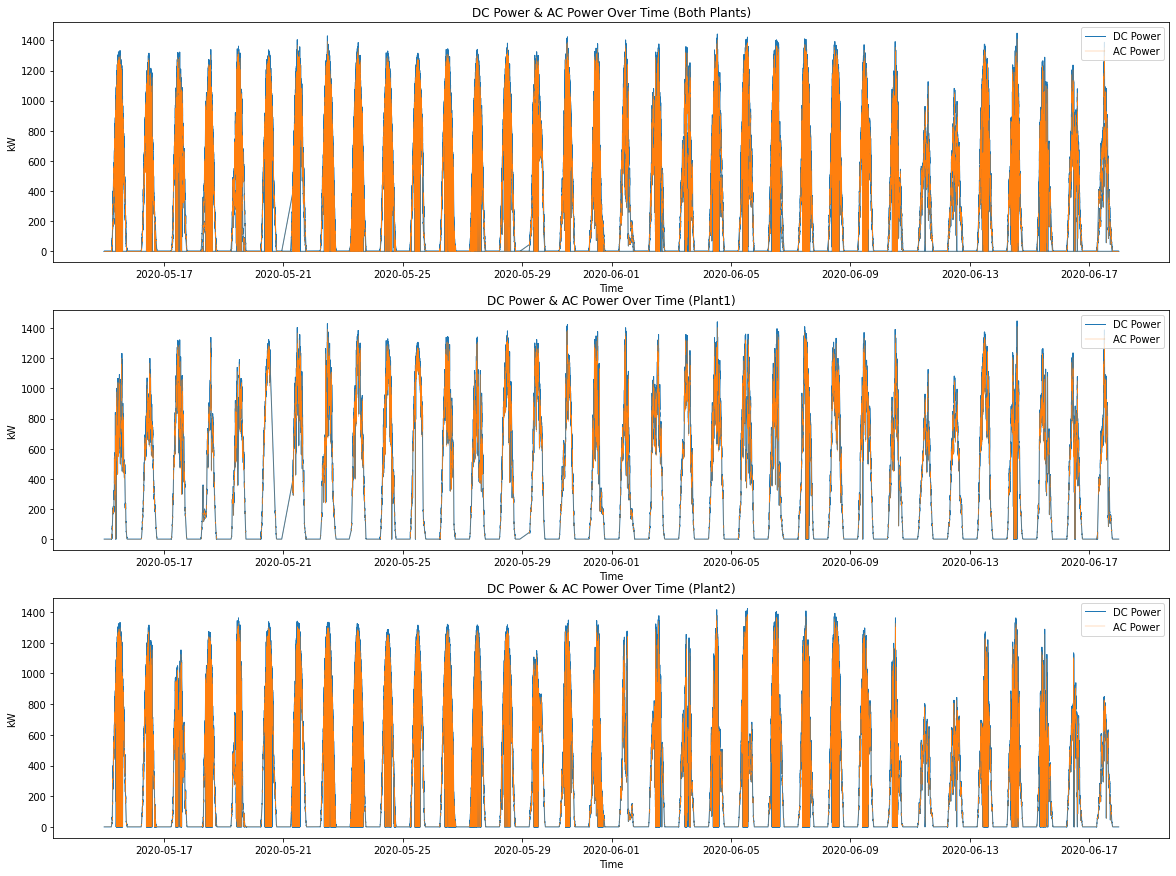

In [54]:
fig, ax = plt.subplots(3, 1, figsize=(20,15))

ax[0].plot(gen_df['DATE_TIME_DT'], gen_df['DC_POWER'], lw=1, label="DC Power")
ax[0].plot(gen_df['DATE_TIME_DT'], gen_df['AC_POWER'], lw=0.25, label="AC Power")
ax[0].set_title('DC Power & AC Power Over Time (Both Plants)')
ax[0].set(xlabel='Time', ylabel='kW')
ax[0].legend(loc='upper right')

ax[1].plot(p1_gen_df['DATE_TIME_DT'], p1_gen_df['DC_POWER'], lw=1, label="DC Power")
ax[1].plot(p1_gen_df['DATE_TIME_DT'], p1_gen_df['AC_POWER'], lw=0.25, label="AC Power")
ax[1].set_title('DC Power & AC Power Over Time (Plant1)')
ax[1].set(xlabel='Time', ylabel='kW')
ax[1].legend(loc='upper right')

ax[2].plot(p2_gen_df['DATE_TIME_DT'], p2_gen_df['DC_POWER'], lw=1, label="DC Power")
ax[2].plot(p2_gen_df['DATE_TIME_DT'], p2_gen_df['AC_POWER'], lw=0.25, label="AC Power")
ax[2].set_title('DC Power & AC Power Over Time (Plant2)')
ax[2].set(xlabel='Time', ylabel='kW')
ax[2].legend(loc='upper right');

Again look how peak times align between generation and weather sensor data in the scatterplots below.

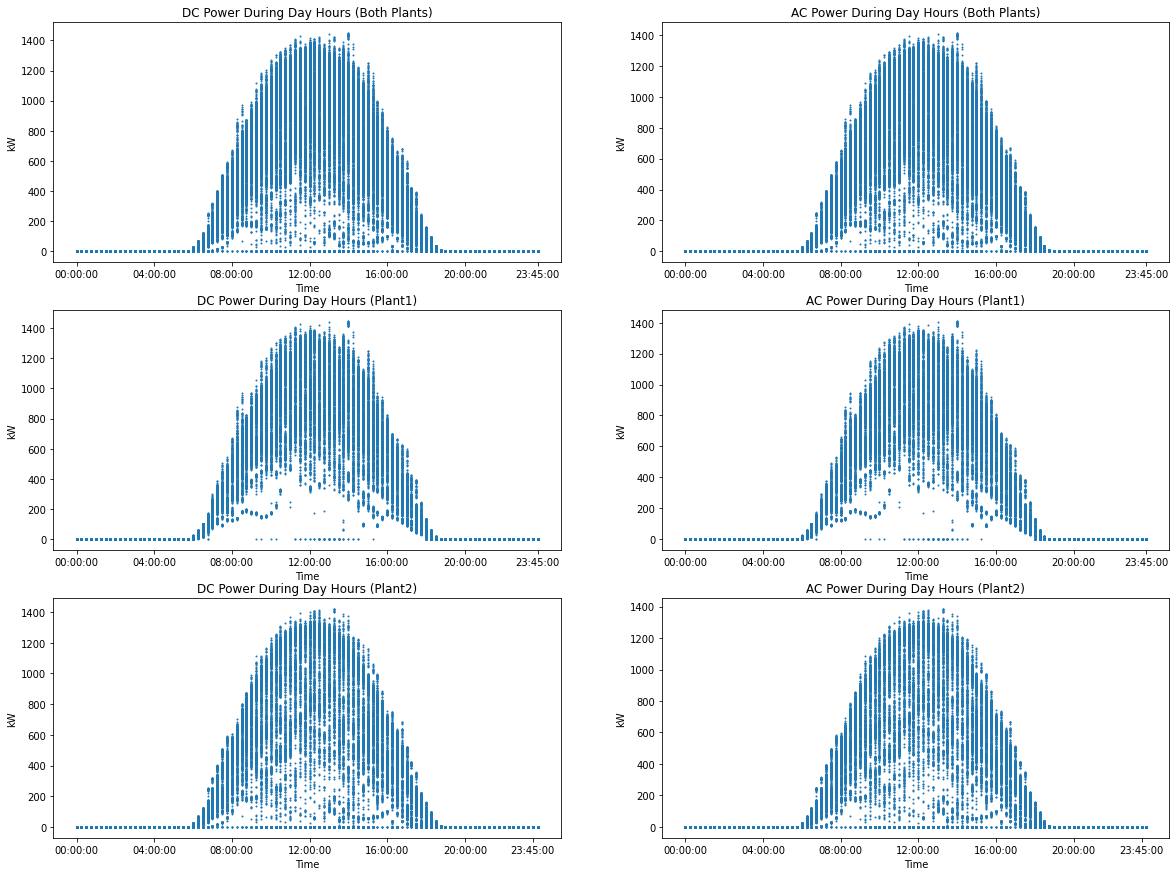

In [55]:
fig, ax = plt.subplots(3, 2, figsize=(20,15))

ax[0,0].scatter(gen_df['DATE_TIME'].str.split(expand=True)[1], gen_df['DC_POWER'], s=1)
ax[0,0].set(xlabel='Time', ylabel='kW')
ax[0,0].set_title('DC Power During Day Hours (Both Plants)')
ax[0,0].set_xticks(['00:00:00', '04:00:00', '08:00:00', '12:00:00', '16:00:00', '20:00:00', '23:45:00'])
ax[0,1].scatter(gen_df['DATE_TIME'].str.split(expand=True)[1], gen_df['AC_POWER'], s=1)
ax[0,1].set(xlabel='Time', ylabel='kW')
ax[0,1].set_title('AC Power During Day Hours (Both Plants)')
ax[0,1].set_xticks(['00:00:00', '04:00:00', '08:00:00', '12:00:00', '16:00:00', '20:00:00', '23:45:00'])

ax[1,0].scatter(p1_gen_df['DATE_TIME'].str.split(expand=True)[1], p1_gen_df['DC_POWER'], s=1)
ax[1,0].set(xlabel='Time', ylabel='kW')
ax[1,0].set_title('DC Power During Day Hours (Plant1)')
ax[1,0].set_xticks(['00:00:00', '04:00:00', '08:00:00', '12:00:00', '16:00:00', '20:00:00', '23:45:00'])
ax[1,1].scatter(p1_gen_df['DATE_TIME'].str.split(expand=True)[1], p1_gen_df['AC_POWER'], s=1)
ax[1,1].set(xlabel='Time', ylabel='kW')
ax[1,1].set_title('AC Power During Day Hours (Plant1)')
ax[1,1].set_xticks(['00:00:00', '04:00:00', '08:00:00', '12:00:00', '16:00:00', '20:00:00', '23:45:00'])

ax[2,0].scatter(p2_gen_df['DATE_TIME'].str.split(expand=True)[1], p2_gen_df['DC_POWER'], s=1)
ax[2,0].set(xlabel='Time', ylabel='kW')
ax[2,0].set_title('DC Power During Day Hours (Plant2)')
ax[2,0].set_xticks(['00:00:00', '04:00:00', '08:00:00', '12:00:00', '16:00:00', '20:00:00', '23:45:00'])
ax[2,1].scatter(p2_gen_df['DATE_TIME'].str.split(expand=True)[1], p2_gen_df['AC_POWER'], s=1)
ax[2,1].set(xlabel='Time', ylabel='kW')
ax[2,1].set_title('AC Power During Day Hours (Plant2)')
ax[2,1].set_xticks(['00:00:00', '04:00:00', '08:00:00', '12:00:00', '16:00:00', '20:00:00', '23:45:00']);

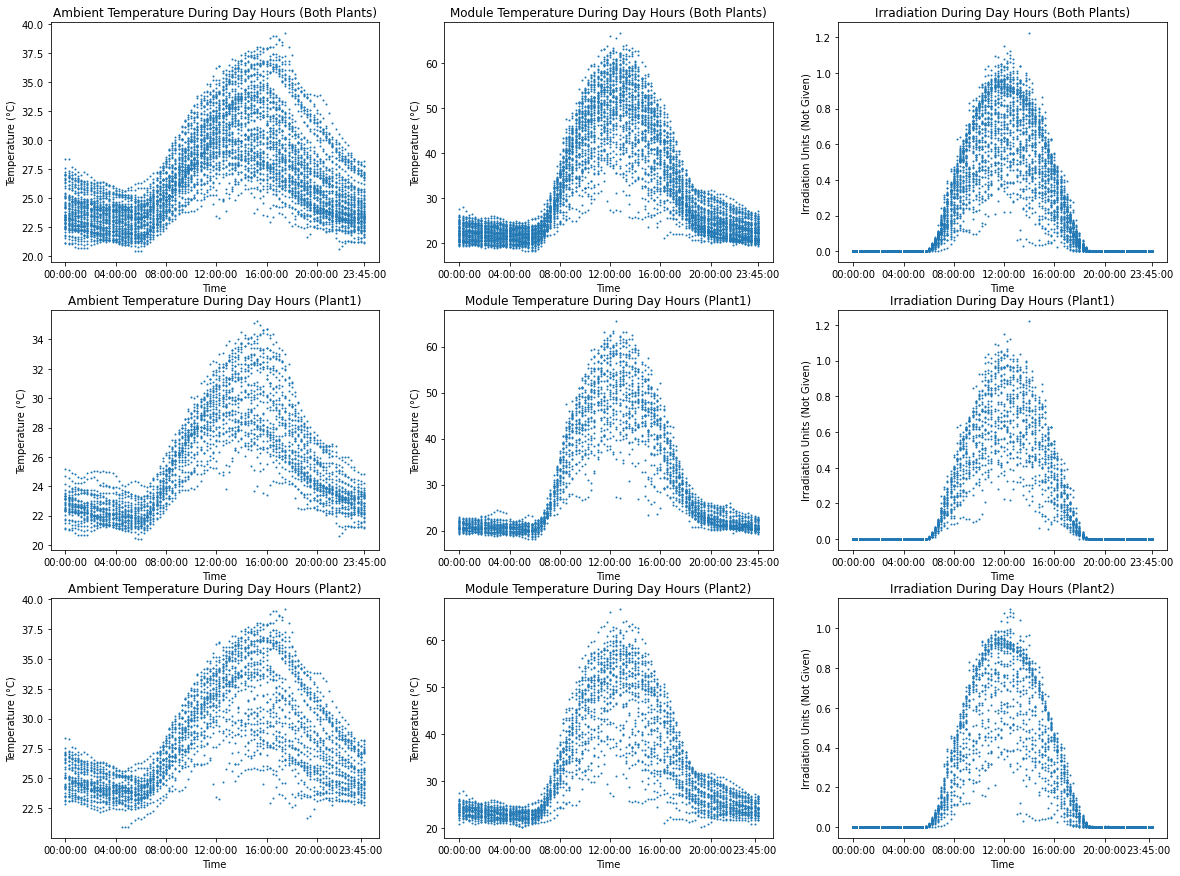

In [56]:
fig, ax = plt.subplots(3, 3, figsize=(20,15))

ax[0,0].scatter(wea_df['DATE_TIME'].str.split(expand=True)[1], wea_df['AMBIENT_TEMPERATURE'], s=1)
ax[0,0].set(xlabel='Time', ylabel='Temperature (°C)')
ax[0,0].set_title('Ambient Temperature During Day Hours (Both Plants)')
ax[0,0].set_xticks(['00:00:00', '04:00:00', '08:00:00', '12:00:00', '16:00:00', '20:00:00', '23:45:00'])
ax[0,1].scatter(wea_df['DATE_TIME'].str.split(expand=True)[1], wea_df['MODULE_TEMPERATURE'], s=1)
ax[0,1].set(xlabel='Time', ylabel='Temperature (°C)')
ax[0,1].set_title('Module Temperature During Day Hours (Both Plants)')
ax[0,1].set_xticks(['00:00:00', '04:00:00', '08:00:00', '12:00:00', '16:00:00', '20:00:00', '23:45:00'])
ax[0,2].scatter(wea_df['DATE_TIME'].str.split(expand=True)[1], wea_df['IRRADIATION'], s=1)
ax[0,2].set(xlabel='Time', ylabel='Irradiation Units (Not Given)')
ax[0,2].set_title('Irradiation During Day Hours (Both Plants)')
ax[0,2].set_xticks(['00:00:00', '04:00:00', '08:00:00', '12:00:00', '16:00:00', '20:00:00', '23:45:00'])

ax[1,0].scatter(p1_wea_df['DATE_TIME'].str.split(expand=True)[1], p1_wea_df['AMBIENT_TEMPERATURE'], s=1)
ax[1,0].set(xlabel='Time', ylabel='Temperature (°C)')
ax[1,0].set_title('Ambient Temperature During Day Hours (Plant1)')
ax[1,0].set_xticks(['00:00:00', '04:00:00', '08:00:00', '12:00:00', '16:00:00', '20:00:00', '23:45:00'])
ax[1,1].scatter(p1_wea_df['DATE_TIME'].str.split(expand=True)[1], p1_wea_df['MODULE_TEMPERATURE'], s=1)
ax[1,1].set(xlabel='Time', ylabel='Temperature (°C)')
ax[1,1].set_title('Module Temperature During Day Hours (Plant1)')
ax[1,1].set_xticks(['00:00:00', '04:00:00', '08:00:00', '12:00:00', '16:00:00', '20:00:00', '23:45:00'])
ax[1,2].scatter(p1_wea_df['DATE_TIME'].str.split(expand=True)[1], p1_wea_df['IRRADIATION'], s=1)
ax[1,2].set(xlabel='Time', ylabel='Irradiation Units (Not Given)')
ax[1,2].set_title('Irradiation During Day Hours (Plant1)')
ax[1,2].set_xticks(['00:00:00', '04:00:00', '08:00:00', '12:00:00', '16:00:00', '20:00:00', '23:45:00'])

ax[2,0].scatter(p2_wea_df['DATE_TIME'].str.split(expand=True)[1], p2_wea_df['AMBIENT_TEMPERATURE'], s=1)
ax[2,0].set(xlabel='Time', ylabel='Temperature (°C)')
ax[2,0].set_title('Ambient Temperature During Day Hours (Plant2)')
ax[2,0].set_xticks(['00:00:00', '04:00:00', '08:00:00', '12:00:00', '16:00:00', '20:00:00', '23:45:00'])
ax[2,1].scatter(p2_wea_df['DATE_TIME'].str.split(expand=True)[1], p2_wea_df['MODULE_TEMPERATURE'], s=1)
ax[2,1].set(xlabel='Time', ylabel='Temperature (°C)')
ax[2,1].set_title('Module Temperature During Day Hours (Plant2)')
ax[2,1].set_xticks(['00:00:00', '04:00:00', '08:00:00', '12:00:00', '16:00:00', '20:00:00', '23:45:00'])
ax[2,2].scatter(p2_wea_df['DATE_TIME'].str.split(expand=True)[1], p2_wea_df['IRRADIATION'], s=1)
ax[2,2].set(xlabel='Time', ylabel='Irradiation Units (Not Given)')
ax[2,2].set_title('Irradiation During Day Hours (Plant2)')
ax[2,2].set_xticks(['00:00:00', '04:00:00', '08:00:00', '12:00:00', '16:00:00', '20:00:00', '23:45:00']);

The below boxplots helped us to identify outliers in generation data among inverters.

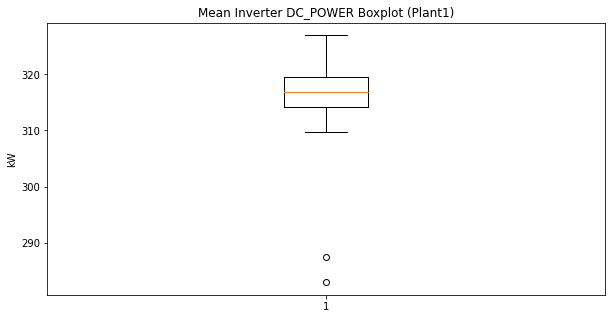

In [57]:
fig, ax = plt.subplots(figsize=(10,5))

ax.boxplot(p1_sorted['DC_POWER'])
ax.set_title('Mean Inverter DC_POWER Boxplot (Plant1)');
ax.set(ylabel='kW');

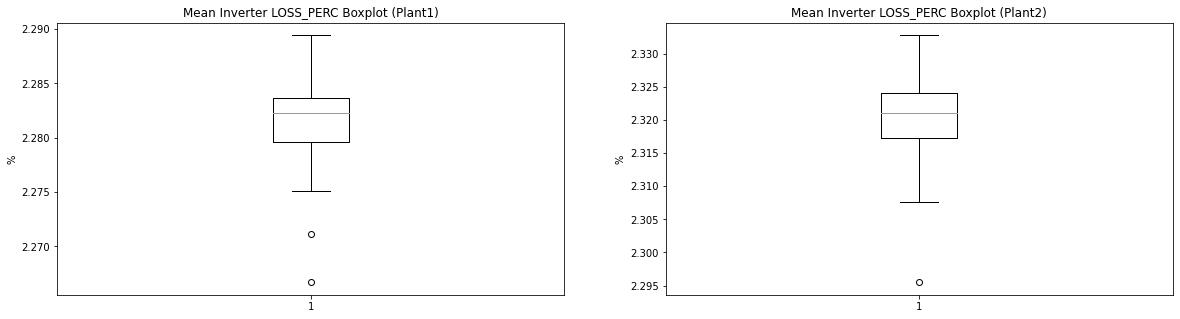

In [58]:
fig, ax = plt.subplots(1, 2, figsize=(20,5))

ax[0].boxplot(p1['LOSS_PERC'])
ax[0].set_title('Mean Inverter LOSS_PERC Boxplot (Plant1)')
ax[0].set(ylabel='%');

ax[1].boxplot(p2['LOSS_PERC'])
ax[1].set_title('Mean Inverter LOSS_PERC Boxplot (Plant2)')
ax[1].set(ylabel='%');